In [23]:
# print out all the fasta files in the this file /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/success_mab_fastas/*
import os
import sys
import glob

# output them all in the following format to a master file
# >filename_VL
# sequence
# >filename_VH
# sequence

output_file = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_biophi_success_mabs.fasta"
# clear the file
os.remove(output_file)
for file in glob.glob("/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/success_mab_fastas/*"):
    with open(file, 'r') as f:
        lines = f.readlines()
    with open(output_file, 'a') as f:
        # replace __ with -
        file = file.replace("__", "-")

        f.write(">" + os.path.basename(file).split(".")[0] + "_VL\n")
        f.write(lines[1])
        f.write(">" + os.path.basename(file).split(".")[0] + "_VH\n")
        f.write(lines[3])
        f.write("\n")
        f.close()

In [24]:
# Biophi run example using output_file
#   OASis evaluates antibody humanness by searching all overlapping 9-mers in
#   repertoires of more than 500 human subjects from the Observed Antibody Space
#   database

#   EXAMPLES:

#           # Evaluate humanness from FASTA file(s), save OASis humanness report to directory
#           biophi oasis input.fa --output ./report.xlsx \
#             --oasis-db sqlite:////Absolute/path/to/oas_human_subject_9mers_2019_11.db

#   INPUTS: Input FASTA file path(s)

print(f"biophi oasis {output_file} --scheme imgt --cdr-definition imgt --output /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/oasis_report_success.xlsx --oasis-db /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/BioPhi/OASis_9mers_v1.db")

biophi oasis /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_biophi_success_mabs.fasta --scheme imgt --cdr-definition imgt --output /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/oasis_report_success.xlsx --oasis-db /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/BioPhi/OASis_9mers_v1.db


In [22]:
# do the same for the antibodyfastas
output_file = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_biophi_antibodysall.fasta"
# remove the file before writitng
os.remove(output_file)
for file in glob.glob("/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/antibodyfastas/*"):
    with open(file, 'r') as f:
        lines = f.readlines()
    with open(output_file, 'a') as f:
        # replace __ with -
        file = file.replace("__", "-")

        f.write(">" + os.path.basename(file).split(".")[0] + "_VL\n")
        f.write(lines[1])
        f.write(">" + os.path.basename(file).split(".")[0] + "_VH\n")
        f.write(lines[3])
        f.write("\n")
        f.close()



In [15]:
print(f"biophi oasis {output_file} --scheme imgt --cdr-definition imgt --output /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/oasis_report_antibodysall.xlsx --oasis-db /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/BioPhi/OASis_9mers_v1.db")

biophi oasis /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_biophi_antibodysall.fasta --scheme imgt --cdr-definition imgt --output /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/oasis_report_antibodysall.xlsx --oasis-db /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/jupyter/BioPhi/OASis_9mers_v1.db


In [114]:
# read in both of the reports and add a column for "success" and "scramble" then append them
import pandas as pd

success_report = pd.read_excel("/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/oasis_report_success.xlsx")
success_report["Type"] = "Success"
scramble_report = pd.read_excel("/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/oasis_report_antibodysall.xlsx")
scramble_report["Type"] = "Scramble"
# append the two dataframes
combined_report = success_report.append(scramble_report)
combined_report

<ipython-input-114-4a077cee17bb>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_report = success_report.append(scramble_report)


,Antibody,Threshold,OASis Percentile,OASis Identity,Germline Content,Heavy V Germline,Heavy J Germline,Heavy OASis Percentile,Heavy OASis Identity,Heavy Non-human peptides,Heavy Germline Content,Light V Germline,Light J Germline,Light OASis Percentile,Light OASis Identity,Light Non-human peptides,Light Germline Content,Type
0,102-13,relaxed,0.154654,0.677570,0.734783,IGHV3-23*03,IGHJ4*01,0.445000,0.750000,"(28,)",0.750000,IGKV7-3*01,IGKJ2*01,0.068020,0.598039,41,0.718182,Success
1,104-15,relaxed,0.012000,0.459716,0.647577,IGHV1-69-2*01,IGHJ4*01,0.027000,0.392857,"(68,)",0.616667,IGKV1-16*01,IGKJ2*01,0.043000,0.535354,46,0.682243,Success
2,105-16,relaxed,0.004000,0.383886,0.638767,IGHV1-3*01,IGHJ4*01,0.013714,0.357143,"(72,)",0.591667,IGKV1-16*01,IGKJ2*01,0.014828,0.414141,58,0.691589,Success
3,109-20,relaxed,0.048611,0.516588,0.704846,IGHV1-3*01,IGHJ1*01,0.013000,0.345794,"(70,)",0.626087,IGKV2-30*01,IGKJ4*01,0.173385,0.692308,32,0.785714,Success
4,1140-1053,relaxed,0.031233,0.479452,0.710638,IGHV1-69-2*01,IGHJ6*01,0.033404,0.403509,"(68,)",0.647541,IGKV4-1*01,IGKJ2*01,0.059190,0.561905,46,0.778761,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,9961-9865,relaxed,0.011550,0.445498,0.687225,IGHV7-4-1*02,IGHJ4*01,0.064364,0.472727,"(58,)",0.720339,IGLV7-46*01,IGLJ3*02,0.015168,0.415842,59,0.651376,Scramble
1496,9968-2304,relaxed,0.004000,0.406417,0.635468,IGHV3-49*04,IGHJ6*01,0.089364,0.554545,"(49,)",0.669492,IGKV6-21*01,IGKJ1*01,0.000000,0.194805,62,0.588235,Scramble
1497,9973-5998,relaxed,0.004000,0.377990,0.657778,IGHV1-69-2*01,IGHJ4*01,0.013000,0.342593,"(71,)",0.663793,IGLV7-46*01,IGLJ2*01,0.015168,0.415842,59,0.651376,Scramble
1498,9974-7844,relaxed,0.004000,0.339713,0.635556,IGHV1-69-2*01,IGHJ4*01,0.009865,0.324324,"(75,)",0.613445,IGKV6-21*01,IGKJ4*01,0.005000,0.357143,63,0.660377,Scramble


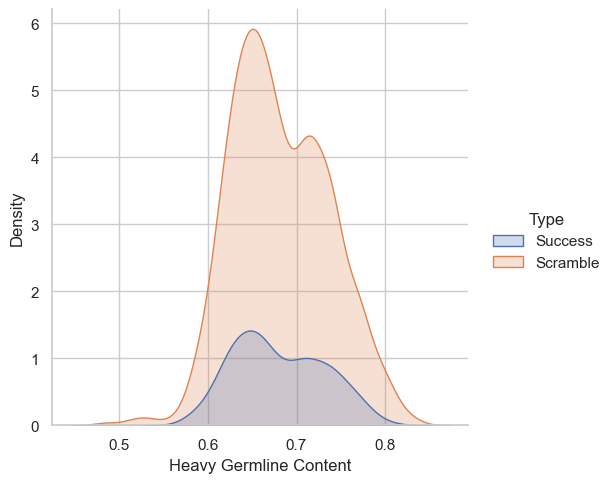

In [115]:
# compare the Heavy Germline Content and Light Germline Content using seaborn distplot and color by the type
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
g = sns.displot(combined_report, x="Heavy Germline Content", hue="Type", kind="kde", fill=True)
plt.show()


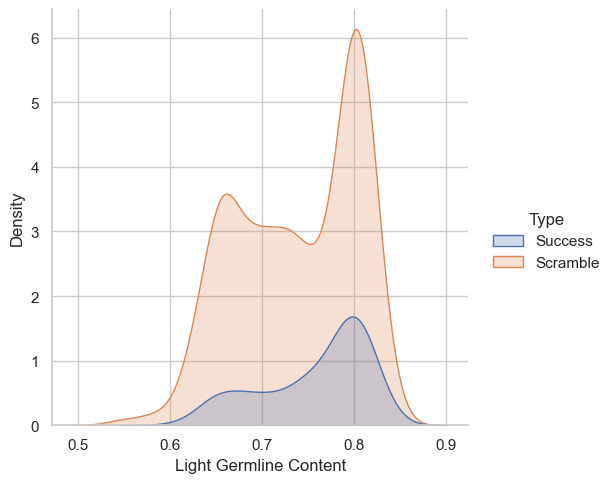

In [116]:
sns.set(style="whitegrid")
g = sns.displot(combined_report, x="Light Germline Content", hue="Type", kind="kde", fill=True)
plt.show()

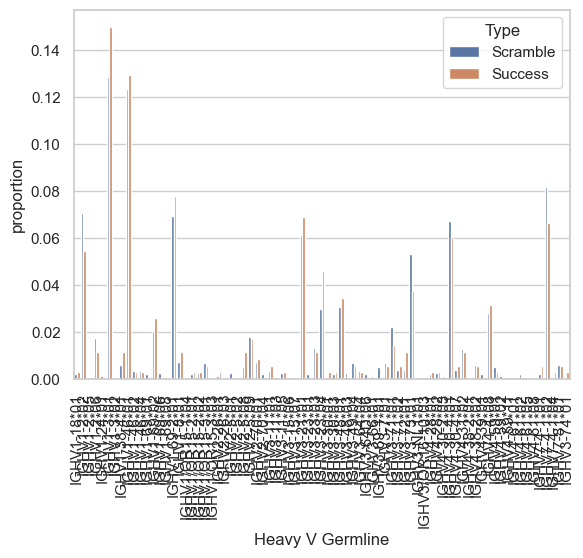

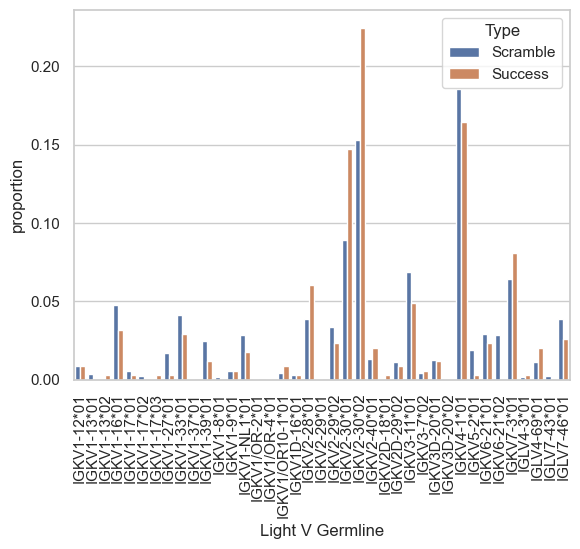

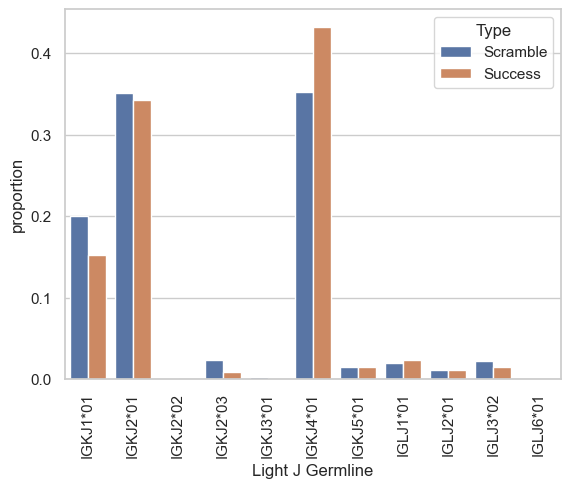

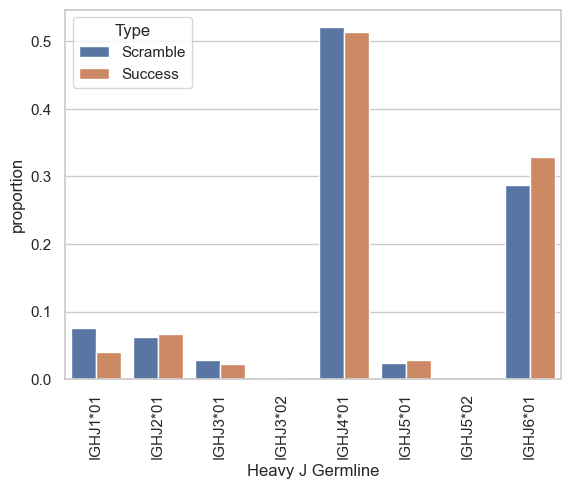

In [117]:
for i in ["Heavy V Germline", "Light V Germline", "Light J Germline", "Heavy J Germline"]:
    grouped = combined_report.groupby(["Type", i]).size().reset_index(name='counts')
    # need the proportion per type
    grouped["proportion"] = grouped["counts"] / grouped.groupby("Type")["counts"].transform("sum")
    sns.set(style="whitegrid")
    g = sns.barplot(x=i, y="proportion", hue="Type", data=grouped)
    # rotate the x labels
    plt.xticks(rotation=90)
    plt.show()

In [122]:
# now try the interaction of Heavy V Germline and Light V Germline and Heavy J Germline and Light J Germline
grouped = combined_report.groupby(["Type", "Heavy V Germline", "Light V Germline"]).size().reset_index(name='counts')
# need the proportion per type
grouped["proportion"] = grouped["counts"] / grouped.groupby("Type")["counts"].transform("sum")
sns.set(style="whitegrid")

# make a new column for the interaction
grouped["interaction"] = grouped["Heavy V Germline"] + " " + grouped["Light V Germline"]
# find the difference between the two types per interaaction (difference in propotions)
grouped = grouped.pivot(index="interaction", columns="Type", values="proportion").reset_index()
# fill in the NaNs with 0
grouped.fillna(0, inplace=True)
grouped["difference"] = grouped["Success"] - grouped["Scramble"]


<Figure size 2000x1000 with 0 Axes>

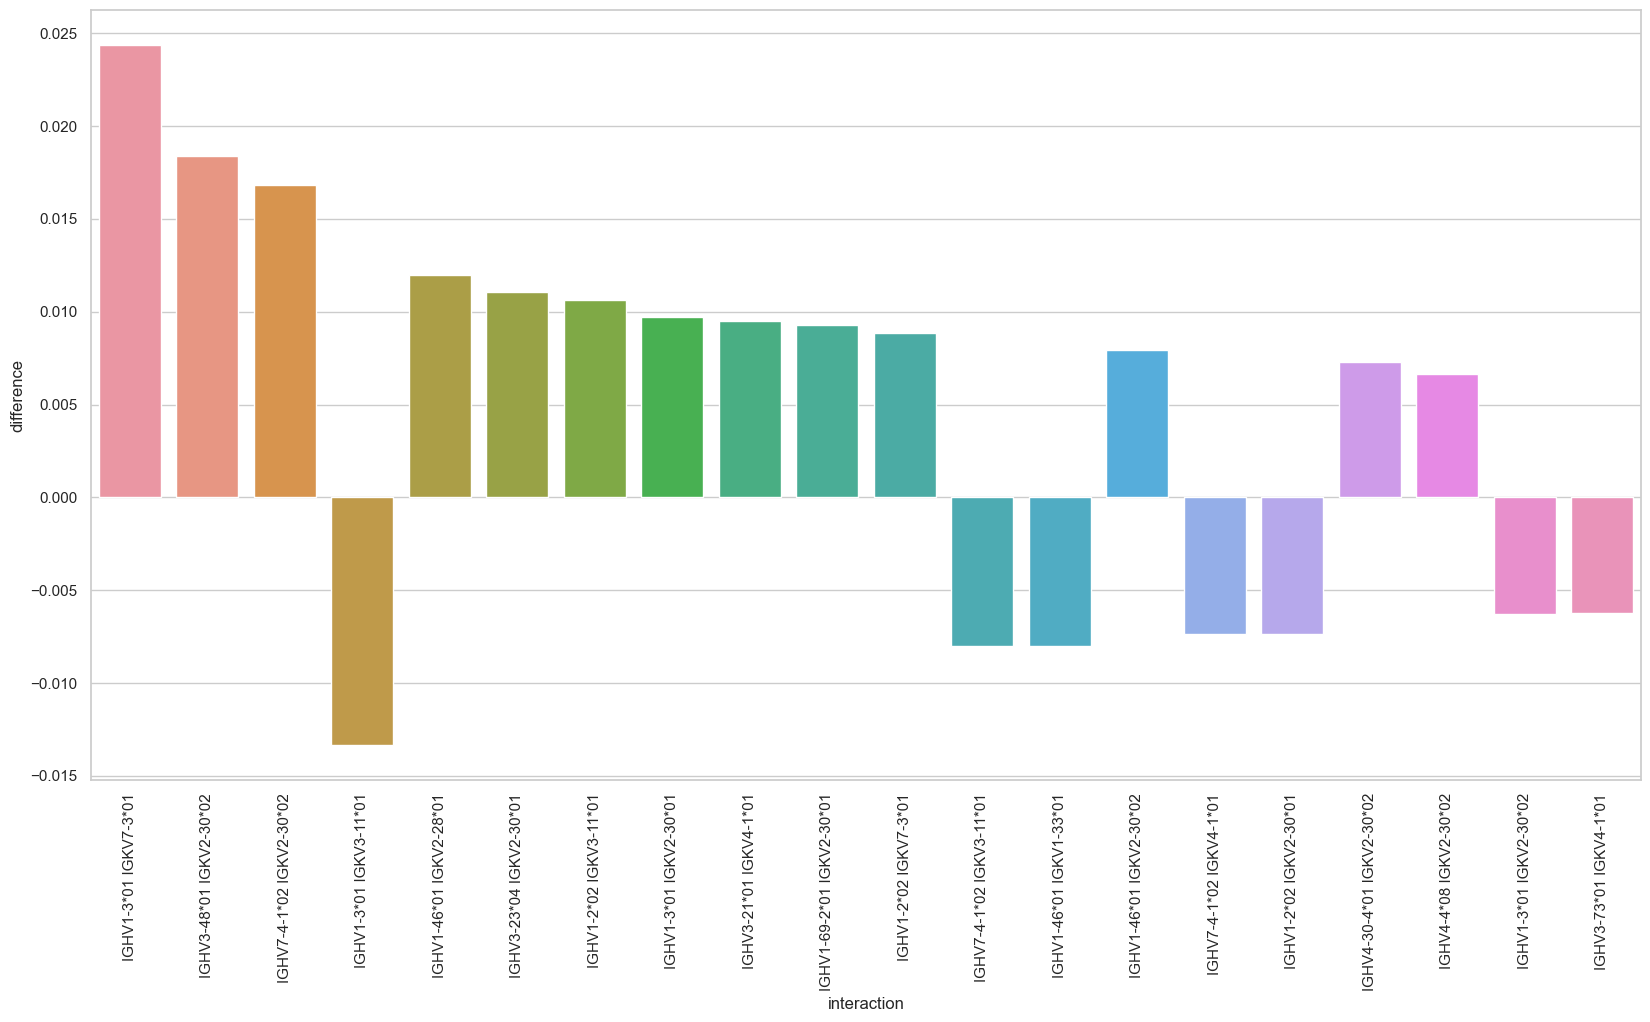

Sum of the absolute differences between success and scramble: 0.20899903938520653


In [123]:
# take just the top 20 differences but baased on absolute value
grouped["abs_difference"] = abs(grouped["difference"])
grouped = grouped.sort_values("abs_difference", ascending=False).head(20)
g = sns.barplot(x="interaction", y="difference", data=grouped) # hue = "Type"
# rotate the x labels
# increase the width of the plot
plt.xticks(rotation=90)
plt.show()
print(f"Sum of the absolute differences between success and scramble: {grouped['abs_difference'].sum()}")

In [124]:
# now try the interaction of Heavy V Germline and Light V Germline and Heavy J Germline and Light J Germline
grouped = combined_report.groupby(["Type", "Heavy J Germline", "Light J Germline"]).size().reset_index(name='counts')
# need the proportion per type
grouped["proportion"] = grouped["counts"] / grouped.groupby("Type")["counts"].transform("sum")
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

# make a new column for the interaction
grouped["interaction"] = grouped["Heavy J Germline"] + " " + grouped["Light J Germline"]
# find the difference between the two types per interaaction (difference in propotions)
grouped = grouped.pivot(index="interaction", columns="Type", values="proportion").reset_index()
# fill in the NaNs with 0
grouped.fillna(0, inplace=True)
grouped["difference"] = grouped["Success"] - grouped["Scramble"]

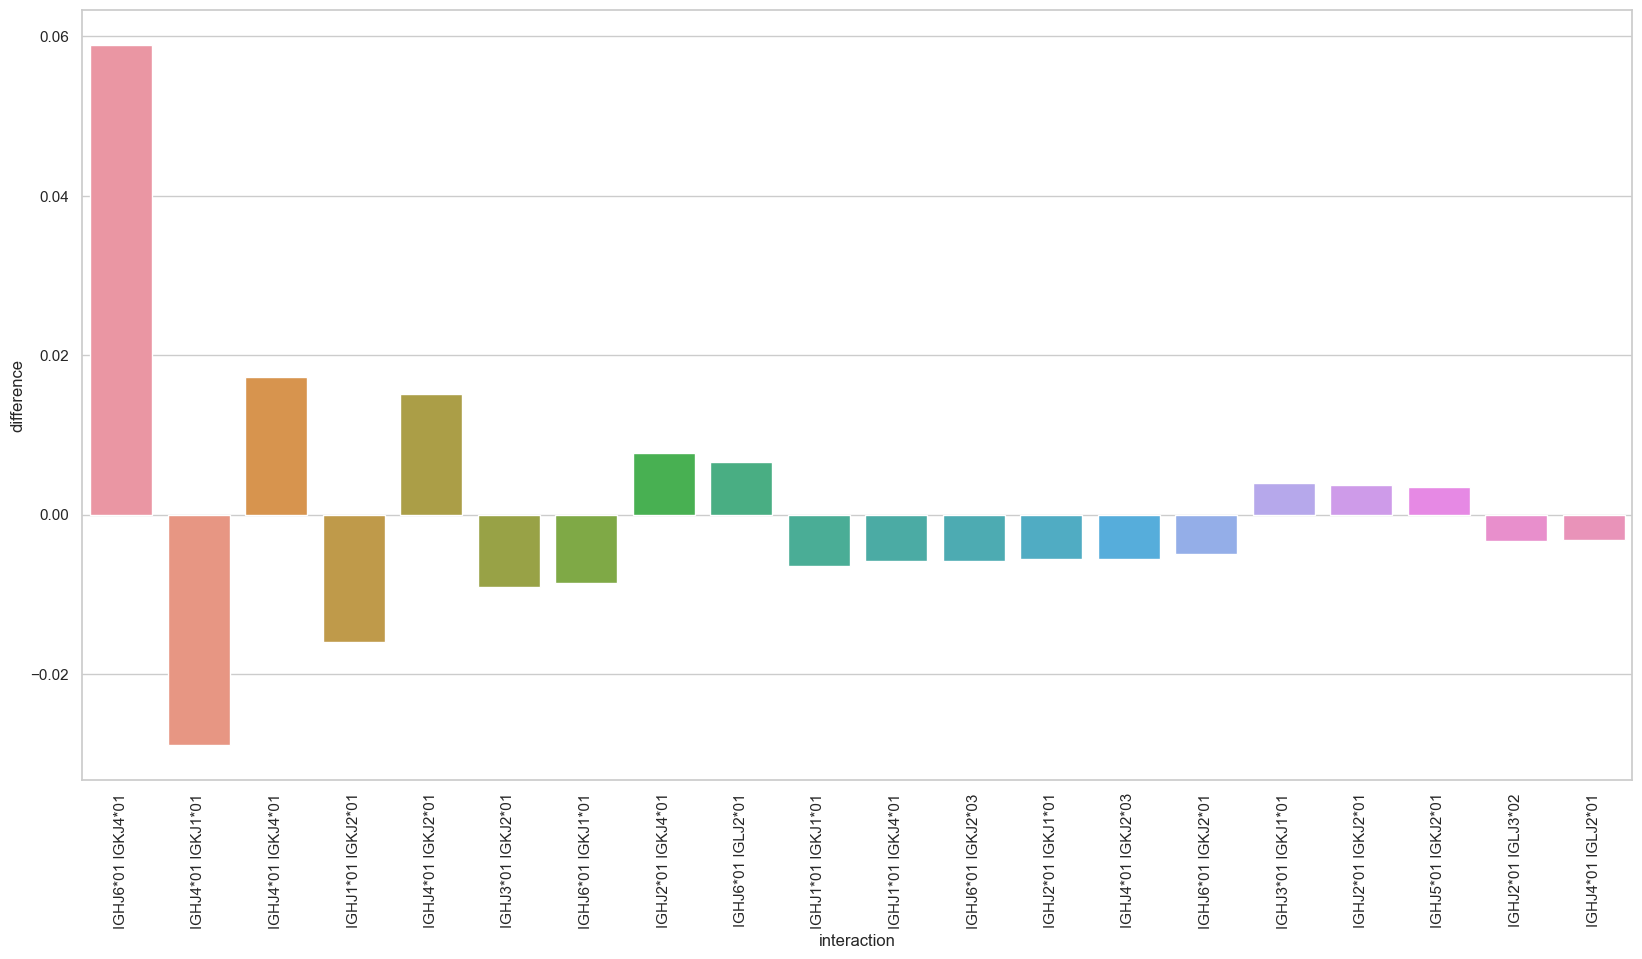

Sum of the absolute differences between success and scramble: 0.22003650336215183


In [125]:
# take just the top 20 differences but baased on absolute value
grouped["abs_difference"] = abs(grouped["difference"])
grouped = grouped.sort_values("abs_difference", ascending=False).head(20)
g = sns.barplot(x="interaction", y="difference", data=grouped) # hue = "Type"
# rotate the x labels
# increase the width of the plot
plt.xticks(rotation=90)
plt.show()
# print the sum of the absolute differences 
print(f"Sum of the absolute differences between success and scramble: {grouped['abs_difference'].sum()}")

In [126]:
!head /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_biophi_success_mabs.fasta

>4749-4670_VL
DVQLQESGPGLVKPSQSLSLTCSVTGYSITSGYYWNWIRQFPGNKLEWMGYITYDGSNNYNPSLKNRISITRDTSKNQFFLKLNSVTTEDTATYYCAREGFTHWGQGTLVTVSA
>4749-4670_VH
DIVMTQSHKFMSTSIGDRVSITCKASQDVSTAVVWYQQKAGQSPKLLIHSASYRYTGVPDRFTGSGSGTDFTFTISSVQAEDLAVYYCQQYYSTPYTFGGGTKLEIK

>472-386_VL
EVKLEESGGGLVQPGGSMKLSCAASGFTFSDAWMDWVRQSPEKGLEWVAEIRNKANNHATYYAESVKGRFTISRDDSKSSVYLQMNNLRPEDTGIYYCDSLIGNQEYWGQGTTLTVSS
>472-386_VH
DIVMTQDELSNPVTSGESVSISCRSSKSLLYKDGKTYLNWFLQRPGQSPQLLIYLMSTRASGVSDRFSGSGSGTDFTLEISRVKAEDVGVYYCQQLVEYPLTFGAGTKLELK



In [3]:
!head /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/static_data/dna.fa

>2_L130/1.1_2_Tiam1_NeuroMab:mAbs_Heavy_P2_B1.HC1_Monoclonal
ACAAGTGTGCAGCCATGGGCAGGCTTACTTCTTCATTCTTGCTACTGATTGTCCCTGCATATGTCCTGTCCCAGGTTACTCTGAAAGAGTCTGGCCCTGGGATATTGCAGCCCTCCCAGACCCTCAGTCTGACTTGTTCTTTCTCTGGGTTTTCACTGAGCACTTCTGGTATGAGTGTAGGCTGGATTCGTCAGCCTTCAGGGAAGGGTCTGGAGTGGCTGGCACACATTTGGTGGAATGATGATAAGTACTATAACCCAGCCCTGAAGAGCCGGCTCACAATCTCCAAGGATACCTCCAACAACCAGGTATTCCTCAAGATCGCCAGTGTGGTCACTGCAGATACTGCCACATATTACTGTGCTCGAATAGCTTCCTACTCGGACTACTGGGGCCAAGGCACCATTCTCACAGTCTCCTCAG
>3_L80/21.1_3_Kv2.1:K+:channel_NeuroMab:mAbs_Heavy_P2_C1.HC1_Monoclonal
AACATATGTCCAATGTCCTCTCCTCAGACACTGAACACACTGACTCTAACCATGGGATGGAGCTGGATCTTTCTCTTTCTCCTGTCAGGAACTGCAGGTGTCCTCTCTGAGGTCCAGCTGCAACAGTCTGGACCTGACCTGGTGAAGCCTGGGGCTTCAGTGCAGATATCCTGCACGACTTCTGGATACACATTCACTGAATACACCATACACTGGGTGAAACAGAGCCATGGAAAGAGCCTTGAGTGGATTGGAAGTATTAATCCTGACAACGGTGGTCCTAGGTACAACCAGAAGTTCAAGGACCAGGCCACATTGACTGTAGACACGTCCTCCACGTCAGCCTACATGGAACTCCGCACCCTGACATCTGATGATTCTGCAGTCTATTACTGTTCAAGATGGAGGGGTAGCACTGACTACTGGGGCCAGGGCACCACTCT

In [ ]:
# new germline stuff

In [13]:
# print out all the fasta files in the this file /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/success_mab_fastas/*
import os
import sys
import glob

# output them all in the following format to a master file
# >filename_VL
# sequence
# >filename_VH
# sequence

output_file = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_mouse_germline_all.fasta"
# clear the file
if os.path.exists(output_file):
    os.remove(output_file)
for file in glob.glob("/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/antibodyfastas_nucleotides/*"):
    with open(file, 'r') as f:
        lines = f.readlines()
    with open(output_file, 'a') as f:
        # replace __ with -
        file = file.replace("__", "-")

        f.write(">" + os.path.basename(file).split(".")[0] + "_VL\n")
        f.write(lines[1])
        f.write(">" + os.path.basename(file).split(".")[0] + "_VH\n")
        f.write(lines[3])
        f.write("\n")
        f.close()

In [14]:
# print out all the fasta files in the this file /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/success_mab_fastas/*
import os
import sys
import glob

# output them all in the following format to a master file
# >filename_VL
# sequence
# >filename_VH
# sequence

output_file = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_mouse_germline_success.fasta"
# clear the file
if os.path.exists(output_file):
    os.remove(output_file)
for file in glob.glob("/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/success_mab_fastas_nucleotides/*"):
    with open(file, 'r') as f:
        lines = f.readlines()
    with open(output_file, 'a') as f:
        # replace __ with -
        file = file.replace("__", "-")

        f.write(">" + os.path.basename(file).split(".")[0] + "_VL\n")
        f.write(lines[1])
        f.write(">" + os.path.basename(file).split(".")[0] + "_VH\n")
        f.write(lines[3])
        f.write("\n")
        f.close()

In [57]:
# generate a master fasta file based on this file /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/cloning_more_data.csv where the LightChain and HeavyChain are columns that we want to use 
import pandas as pd

df = pd.read_csv("/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/cloning_more_data.csv")
output_file = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_antibody_fromcloning.fasta"
with open(f"{output_file}", 'w') as f:
    for index, row in df.iterrows():
        f.write(f">{row['Clone']}_VL\n{row['LightChain']}\n>{row['Clone']}_VH\n{row['HeavyChain']}\n\n")


In [1]:
from crowelab_pyir import PyIR

# Define the path to your input file and use each of the output files produced by the previous steps
FILE = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_mouse_germline_success.fasta"


# Specify the species as mouse for the analysis
# The '--species' argument is used to specify the species for PyIR
# 'mouse' should be used for mouse sequences. Check PyIR documentation for the exact species identifier if this does not work.
pyir_filtered = PyIR(query=FILE, args=['--outfmt', 'dict', '--enable_filter', '--species', 'mouse'])

# Run the analysis
result_success = pyir_filtered.run()


FILE = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_mouse_germline_all.fasta"
pyir_filtered = PyIR(query=FILE, args=['--outfmt', 'dict', '--enable_filter', '--species', 'mouse'])

# Run the analysis
result_all = pyir_filtered.run()
# Print the size of the Python returned dictionary to see how many sequences were analyzed





Splitting input fasta file /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_mouse_germline_success.fasta
694 sequences successfully split into 20 pieces
Starting process pool using 16 processors


100%|██████████| 694/694 [00:06<00:00, 107.58seq/s]


690 Passed filtering
694 sequences processed in 6.77 seconds, 102 sequences / s
Analysis complete, returning dictionary
Splitting input fasta file /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_mouse_germline_all.fasta
19,996 sequences successfully split into 468 pieces
Starting process pool using 16 processors


100%|██████████| 19996/19996 [02:24<00:00, 138.17seq/s]


18265 Passed filtering
19,996 sequences processed in 145.2 seconds, 137 sequences / s
Analysis complete, returning dictionary


In [2]:
# now also run the cloning data
FILE = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_antibody_fromcloning.fasta"
pyir_filtered = PyIR(query=FILE, args=['--outfmt', 'dict', '--enable_filter', '--species', 'mouse'])
result_cloning = pyir_filtered.run()

Splitting input fasta file /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/master_antibody_fromcloning.fasta
684 sequences successfully split into 20 pieces
Starting process pool using 16 processors


100%|██████████| 684/684 [00:06<00:00, 105.41seq/s]


679 Passed filtering
684 sequences processed in 6.72 seconds, 101 sequences / s
Analysis complete, returning dictionary


In [112]:
# turn the results into a dataframe
import pandas as pd
df_success = pd.DataFrame(result_success)
df_all = pd.DataFrame(result_all)
# transpose them both
df_success = df_success.T
df_all = df_all.T
# create a new column for success and scramble as a category
df_success["category"] = "Success"
df_all["category"] = "Scramble"
# append the two dataframes
df_combined = df_success.append(df_all)


<ipython-input-112-80c267c5d17c>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_success.append(df_all)


In [113]:
#also merge in result_cloning
df_cloning = pd.DataFrame(result_cloning)
df_cloning = df_cloning.T
df_cloning["category"] = "Success"
df_combined = df_combined.append(df_cloning)

<ipython-input-113-e6694f708415>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df_cloning)


In [114]:
# increase the number of columns shown
pd.set_option('display.max_columns', 500)
df_combined

,sequence_id,sequence,locus,stop_codon,vj_in_frame,v_frameshift,productive,rev_comp,complete_vdj,v_call,d_call,j_call,sequence_alignment,germline_alignment,sequence_alignment_aa,germline_alignment_aa,v_alignment_start,v_alignment_end,d_alignment_start,d_alignment_end,j_alignment_start,j_alignment_end,v_sequence_alignment,v_sequence_alignment_aa,v_germline_alignment,v_germline_alignment_aa,d_sequence_alignment,d_sequence_alignment_aa,d_germline_alignment,d_germline_alignment_aa,j_sequence_alignment,j_sequence_alignment_aa,j_germline_alignment,j_germline_alignment_aa,fwr1,fwr1_aa,cdr1,cdr1_aa,fwr2,fwr2_aa,cdr2,cdr2_aa,fwr3,fwr3_aa,fwr4,fwr4_aa,cdr3,cdr3_aa,junction,junction_length,junction_aa,junction_aa_length,v_score,d_score,j_score,v_cigar,d_cigar,j_cigar,v_support,d_support,j_support,v_identity,d_identity,j_identity,v_sequence_start,v_sequence_end,v_germline_start,v_germline_end,d_sequence_start,d_sequence_end,d_germline_start,d_germline_end,j_sequence_start,j_sequence_end,j_germline_start,j_germline_end,fwr1_start,fwr1_end,cdr1_start,cdr1_end,fwr2_start,fwr2_end,cdr2_start,cdr2_end,fwr3_start,fwr3_end,fwr4_start,fwr4_end,cdr3_start,cdr3_end,np1,np1_length,np2,np2_length,v_family,d_family,j_family,cdr3_aa_length,category
501-413_VH,501-413_VH,AACATTATGATGACACAGTCGCCATCATCTCTGGCTGTGTCTGCAG...,IGK,F,T,F,T,F,F,IGKV8-27*01,,IGKJ5*01,AACATTATGATGACACAGTCGCCATCATCTCTGGCTGTGTCTGCAG...,AACATTATGATGACACAGTCGCCATCATCTCTGGCTGTGTCTGCAG...,NIMMTQSPSSLAVSAGEKVTMSCKSSQSVLYSSNQKNFLAWYQQRP...,NIMMTQSPSSLAVSAGEKVTMSCKSSQSVLYSSNQKNYLAWYQQKP...,1,300,,,301,336,AACATTATGATGACACAGTCGCCATCATCTCTGGCTGTGTCTGCAG...,NIMMTQSPSSLAVSAGEKVTMSCKSSQSVLYSSNQKNFLAWYQQRP...,AACATTATGATGACACAGTCGCCATCATCTCTGGCTGTGTCTGCAG...,NIMMTQSPSSLAVSAGEKVTMSCKSSQSVLYSSNQKNYLAWYQQKP...,,,,,CTCACGTTCGGTGCTGGGACCAAGCTGGAGCTGAAA,LTFGAGTKLELK,CTCACGTTCGGTGCTGGGACCAAGCTGGAGCTGAAA,LTFGAGTKLELK,AACATTATGATGACACAGTCGCCATCATCTCTGGCTGTGTCTGCAG...,NIMMTQSPSSLAVSAGEKVTMSCKSS,CAAAGTGTTTTATACAGTTCAAATCAGAAGAACTTC,QSVLYSSNQKNF,TTGGCCTGGTACCAGCAGAGACCAGGGCAGTCTCCTAAACTGCTGA...,LAWYQQRPGQSPKLLIY,TGGGCATCC,WAS,GCTAGGGAATCTGGTGTCCCTGATCGCTTCACAGGCAGTGGATCTG...,ARESGVPDRFTGSGSGTDFTLTISSVQSEDLAVYYC,TTCGGTGCTGGGACCAAGCTGGAGCTGAAA,FGAGTKLELK,CATCAATTCCTCTCCTCGCTCACG,HQFLSSLT,TGTCATCAATTCCTCTCCTCGCTCACGTTC,30,CHQFLSSLTF,10,450.572,,69.904,300M36S,,300S1N36M1N,1.074e-128,,2.311e-16,98.000,,100.000,1,300,1,300,,,,,301,336,2,37,1,78,79,114,115,165,166,174,175,282,307,336,283,306,,0,,,IGKV8-27,,IGKJ5,8,Success
3686-3621_VL,3686-3621_VL,CAGGTGCAGCTGAAGCAGTCAGGACCTGGCCTAGTGCAGCCCTCAC...,IGH,F,T,F,T,F,F,"IGHV2-2*02,IGHV2-2*03",IGHD1-1*01,IGHJ1*01,CAGGTGCAGCTGAAGCAGTCAGGACCTGGCCTAGTGCAGCCCTCAC...,CAGGTGCAGCTGAAGCAGTCAGGACCTGGCCTAGTGCAGCCCTCAC...,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTSYGVHWVRQSPGKGLE...,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTSYGVHWVRQSPGKGLE...,1,290,291,301,306,357,CAGGTGCAGCTGAAGCAGTCAGGACCTGGCCTAGTGCAGCCCTCAC...,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTSYGVHWVRQSPGKGLE...,CAGGTGCAGCTGAAGCAGTCAGGACCTGGCCTAGTGCAGCCCTCAC...,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTSYGVHWVRQSPGKGLE...,TTACTACGGTA,YYG,TTACTACGGTA,YYG,CTACTGGTACTTCGATGTCTGGGGCGCAGGGACCACGGTCACCGTC...,YWYFDVWGAGTTVTVSS,CTACTGGTACTTCGATGTCTGGGGCGCAGGGACCACGGTCACCGTC...,YWYFDVWGAGTTVTVSS,CAGGTGCAGCTGAAGCAGTCAGGACCTGGCCTAGTGCAGCCCTCAC...,QVQLKQSGPGLVQPSQSLSITCTVS,GGTTTCTCATTAACTAGCTATGGT,GFSLTSYG,GTACACTGGGTTCGCCAGTCTCCAGGAAAGGGTCTGGAGTGGCTGG...,VHWVRQSPGKGLEWLGV,ATATGGAGTGGTGGATACACA,IWSGGYT,GACTATAATGCAGCTTTCATATCCAGACTGAGCATCAGCAAGGACG...,DYNAAFISRLSISKDDSKSQVFFKMNSLQPNDTAIYYC,TGGGGCGCAGGGACCACGGTCACCGTCTCCTCA,WGAGTTVTVSS,GCCAGTTACTACGGTAATACCTACTGGTACTTCGATGTC,ASYYGNTYWYFDV,TGTGCCAGTTACTACGGTAATACCTACTGGTACTTCGATGTCTGG,45,CASYYGNTYWYFDVW,15,441.224,21.837,100.667,290M67S3N,290S4N11M56S8N,305S52M1N,7.483e-126,3.484e-02,1.350e-25,98.621,100.000,100.000,1,290,1,290,291,301,5,15,306,357,1,52,1,75,76,99,100,150,151,171,172,285,325,357,286,324,,0,ATAC,4,IGHV2-2,IGHD1-1,IGHJ1,13,Success
3686-3621_VH,3686-3621_VH,GACATTGTGATGACACAGTCTCCATCCTCCCTGGCTATGTCAGTAG...,IGK,F,T,F

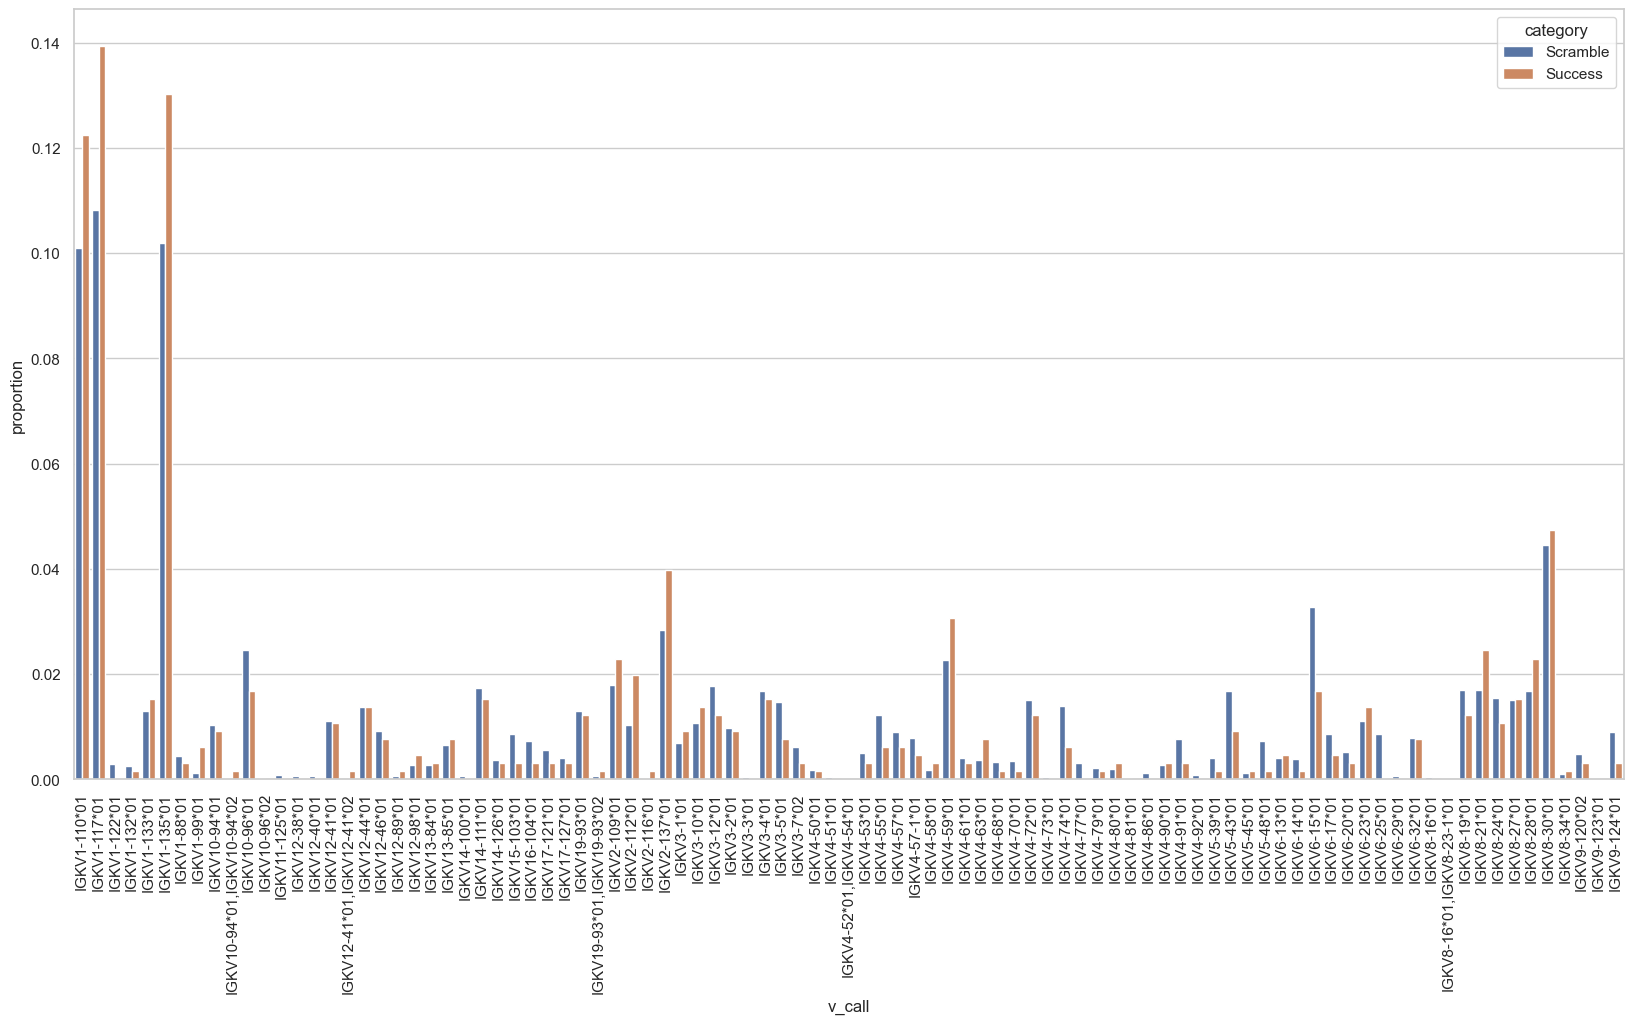

In [115]:
# groupby and get proportions for the V d and j family but first subset the datafraame to IGK for locus and IGH for locus
import seaborn as sns
import matplotlib.pyplot as plt

igh = df_combined[df_combined["locus"] == "IGH"]
igk = df_combined[df_combined["locus"] == "IGK"]

# groupby and get proportions for the v_call and j_call for the igk
grouped = igk.groupby(["category", "v_call"]).size().reset_index(name='counts')
# need the proportion per type
# increase the figure size
plt.figure(figsize=(20, 10))
grouped["proportion"] = grouped["counts"] / grouped.groupby("category")["counts"].transform("sum")
sns.set(style="whitegrid")
sns.barplot(x="v_call", y="proportion", hue="category", data=grouped)
# show the plot
plt.xticks(rotation=90)
plt.show()


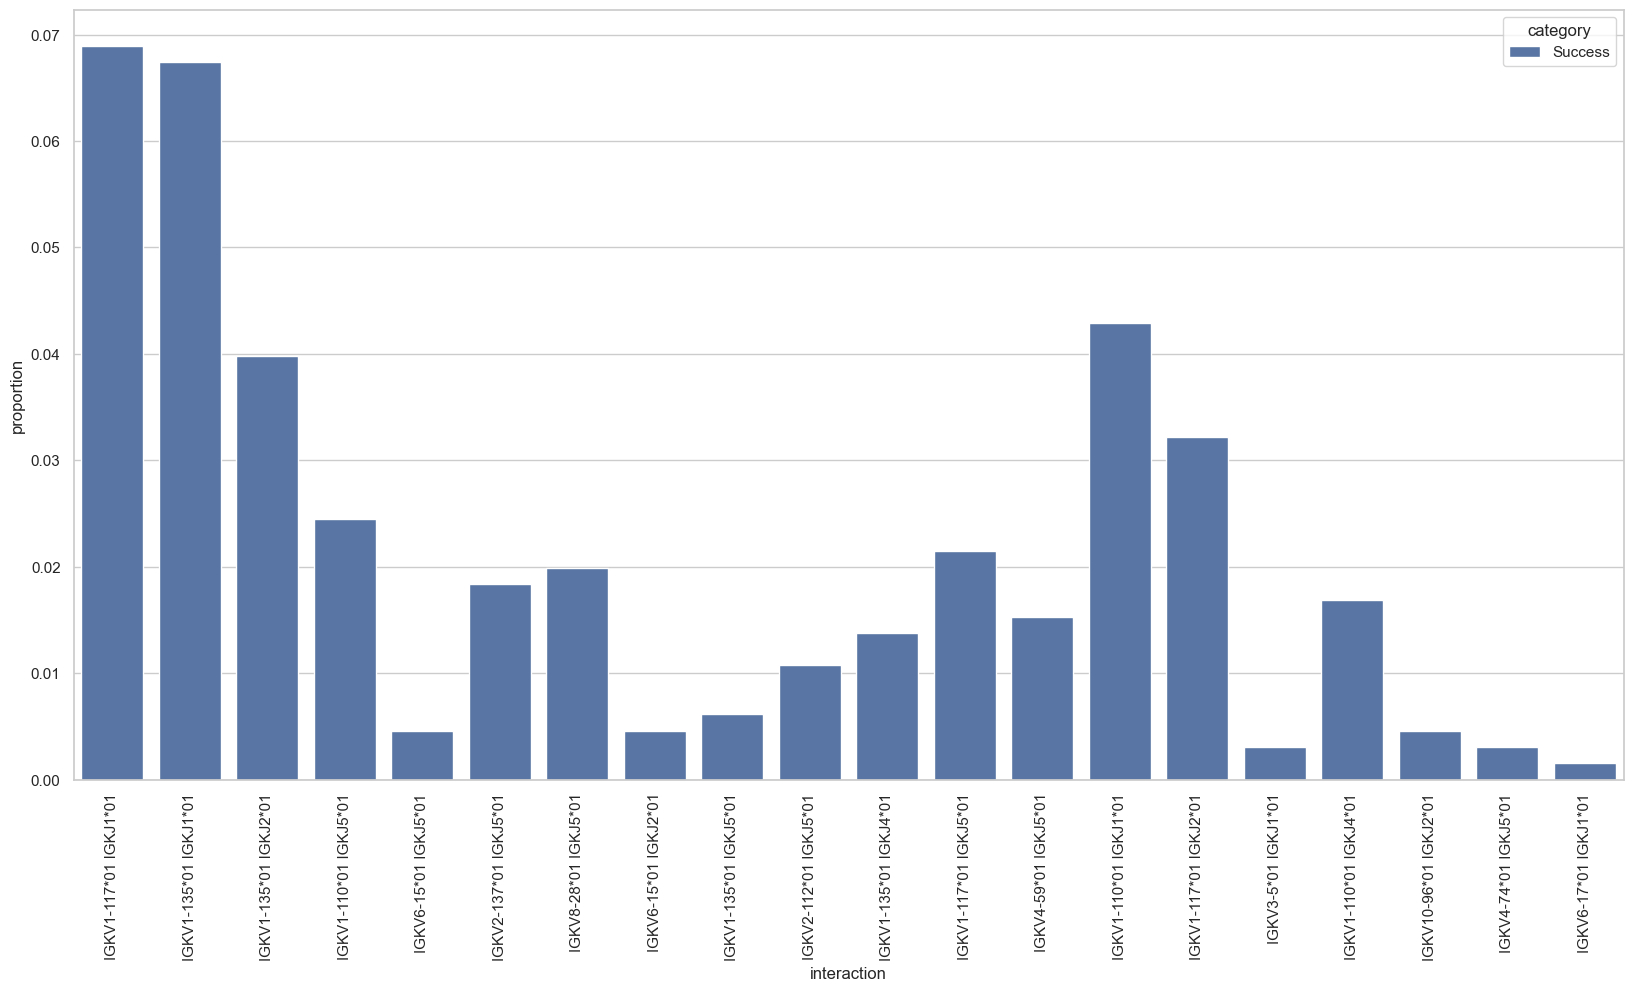

In [116]:
# do the same but for the interaction of the v_call and j_call
grouped = igk.groupby(["category", "v_call", "j_call"]).size().reset_index(name='counts')
# create a new column for the interaction
grouped["interaction"] = grouped["v_call"] + " " + grouped["j_call"]
# need the proportion per type
# increase the figure size
plt.figure(figsize=(20, 10))
grouped["proportion"] = grouped["counts"] / grouped.groupby("category")["counts"].transform("sum")
# filter to only the top 20 interactions based on the difference in proportions between success and scramble
top20 = grouped.groupby("interaction")["proportion"].diff().abs().nlargest(20).index
groupedt = grouped.loc[top20]
sns.set(style="whitegrid")
sns.barplot(x="interaction", y="proportion", hue="category", data=groupedt)
# show the plot
plt.xticks(rotation=90)
plt.show()


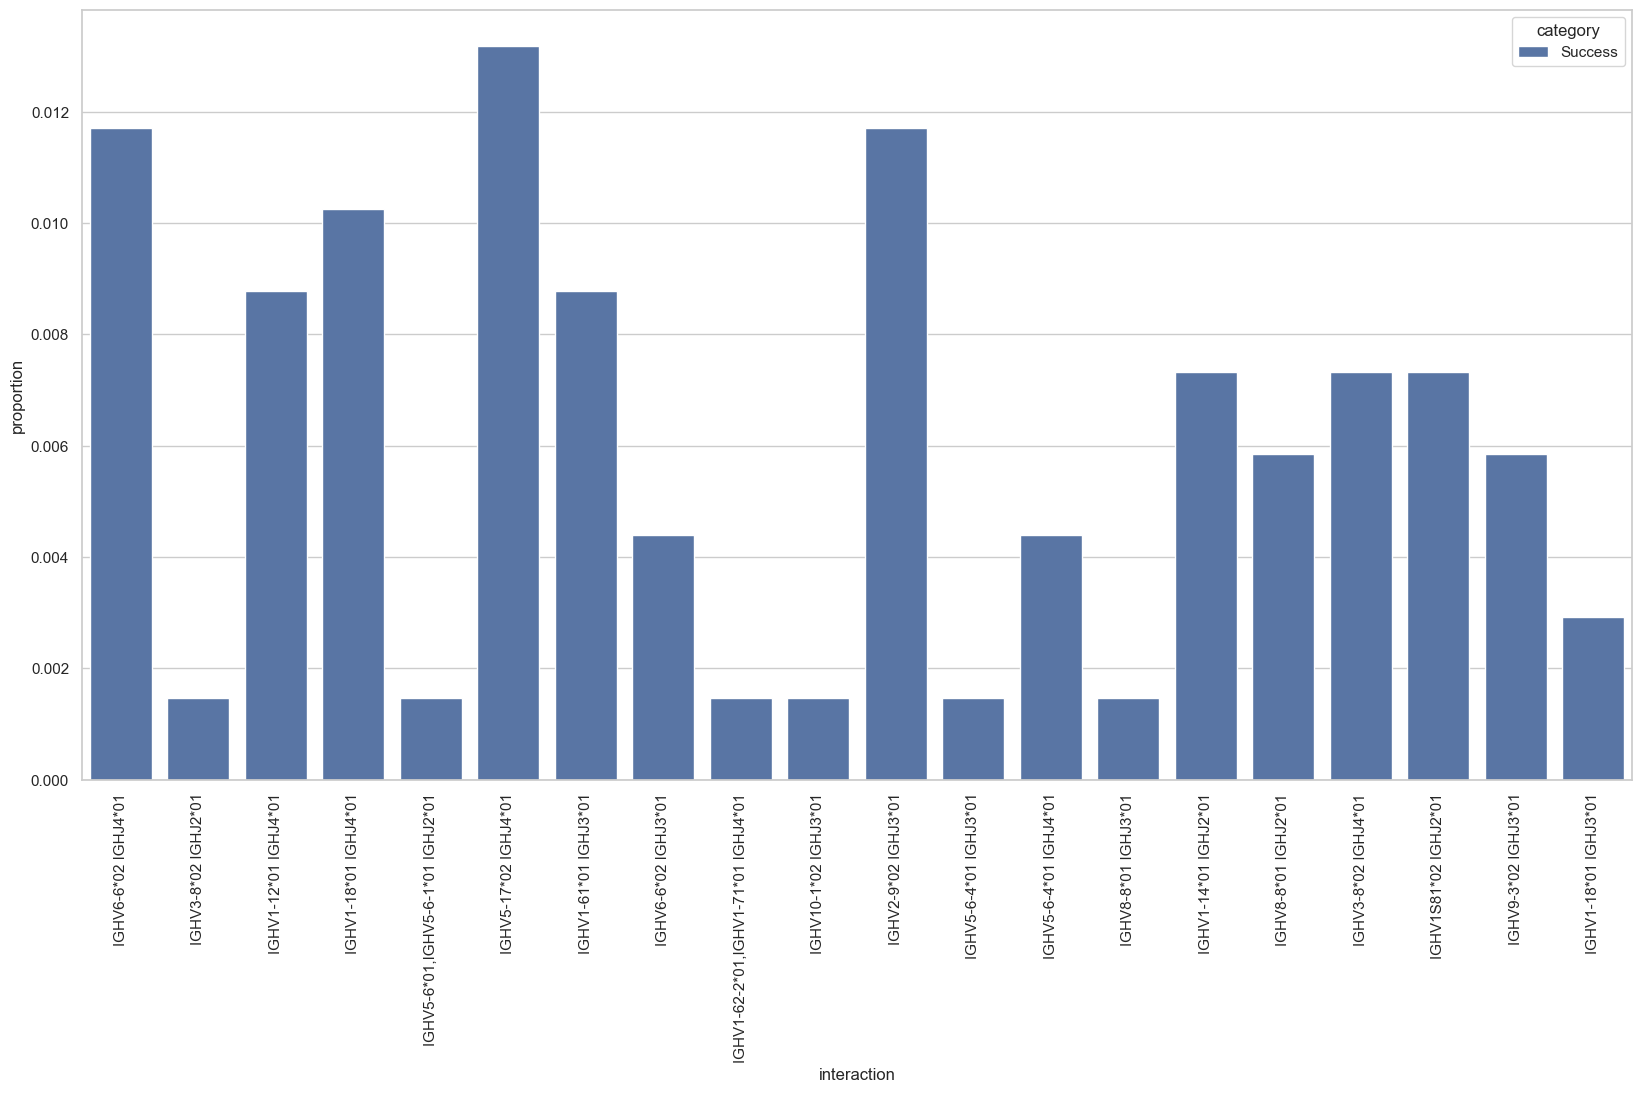

In [117]:
# do the same for IGH
grouped = igh.groupby(["category", "v_call", "j_call"]).size().reset_index(name='counts')
# create a new column for the interaction
grouped["interaction"] = grouped["v_call"] + " " + grouped["j_call"]
# need the proportion per type
# increase the figure size
plt.figure(figsize=(20, 10))
grouped["proportion"] = grouped["counts"] / grouped.groupby("category")["counts"].transform("sum")

# filter to only the top 20 interactions based on the difference in proportions between success and scramble
top20 = grouped.groupby("interaction")["proportion"].diff().abs().nlargest(20).index
groupedt = grouped.loc[top20]
sns.set(style="whitegrid")
sns.barplot(x="interaction", y="proportion", hue="category", data=groupedt)
# show the plot
plt.xticks(rotation=90)
plt.show()


In [104]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

import xgboost as xgb

def calculate_metrics(y_test, predictions, model, X_test_processed):
    try:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_processed)[:, 1])
    except AttributeError:
        # For models that do not support predict_proba
        roc_auc = "N/A"
    metrics = {
        "accuracy": accuracy_score(y_test, predictions),
        "precision": precision_score(y_test, predictions, zero_division=0),
        "recall": recall_score(y_test, predictions, zero_division=0),
        "f1": f1_score(y_test, predictions, zero_division=0),
        "roc_auc": roc_auc
    }
    return metrics

def train_and_evaluate_models(df, target_column='Success'):
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ])

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    # Models to train
    models = {
        "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=None, max_features='auto'),
        #"LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
        "MLPClassifier": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42),
        #"SVC": SVC(probability=True, random_state=42),  # probability=True for ROC-AUC
        "KNeighborsClassifier": KNeighborsClassifier(),
        #"GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        #"XGBoostClassifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        # also do a simple model
        #"SimpleModel": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, max_depth=1, n_estimators=1),
        # also do a neural network
        #"SimpleNeuralNetwork": MLPClassifier(hidden_layer_sizes=(1,), activation='relu', solver='adam', max_iter=300, random_state=42),
        # also do a deep neural network
        "DeepNeuralNetwork": MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', max_iter=300, random_state=42)
    }
    ensemble = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='soft')


    results = {}

    for model_name, model in models.items():
        model.fit(X_train_processed, y_train)
        predictions = model.predict(X_test_processed)
        metrics = calculate_metrics(y_test, predictions, model, X_test_processed)
        results[model_name] = metrics
    
    # Fit the ensemble model
    ensemble.fit(X_train_processed, y_train)
    predictions = ensemble.predict(X_test_processed)
    metrics = calculate_metrics(y_test, predictions, ensemble, X_test_processed)
    results["Ensemble"] = metrics
    return results

# Assuming df is your DataFrame and 'Success' is your target column
# results = train_and_evaluate_models(df, target_column='Success')
# print(results)


In [118]:
# set the mabid to everything before the last underscore
df_combined["mabid"] = df_combined.index.str.rsplit("_", 1).str[0]
df_combined

<ipython-input-118-5d43eaa3ac3d>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df_combined["mabid"] = df_combined.index.str.rsplit("_", 1).str[0]


,sequence_id,sequence,locus,stop_codon,vj_in_frame,v_frameshift,productive,rev_comp,complete_vdj,v_call,d_call,j_call,sequence_alignment,germline_alignment,sequence_alignment_aa,germline_alignment_aa,v_alignment_start,v_alignment_end,d_alignment_start,d_alignment_end,j_alignment_start,j_alignment_end,v_sequence_alignment,v_sequence_alignment_aa,v_germline_alignment,v_germline_alignment_aa,d_sequence_alignment,d_sequence_alignment_aa,d_germline_alignment,d_germline_alignment_aa,j_sequence_alignment,j_sequence_alignment_aa,j_germline_alignment,j_germline_alignment_aa,fwr1,fwr1_aa,cdr1,cdr1_aa,fwr2,fwr2_aa,cdr2,cdr2_aa,fwr3,fwr3_aa,fwr4,fwr4_aa,cdr3,cdr3_aa,junction,junction_length,junction_aa,junction_aa_length,v_score,d_score,j_score,v_cigar,d_cigar,j_cigar,v_support,d_support,j_support,v_identity,d_identity,j_identity,v_sequence_start,v_sequence_end,v_germline_start,v_germline_end,d_sequence_start,d_sequence_end,d_germline_start,d_germline_end,j_sequence_start,j_sequence_end,j_germline_start,j_germline_end,fwr1_start,fwr1_end,cdr1_start,cdr1_end,fwr2_start,fwr2_end,cdr2_start,cdr2_end,fwr3_start,fwr3_end,fwr4_start,fwr4_end,cdr3_start,cdr3_end,np1,np1_length,np2,np2_length,v_family,d_family,j_family,cdr3_aa_length,category,mabid
501-413_VH,501-413_VH,AACATTATGATGACACAGTCGCCATCATCTCTGGCTGTGTCTGCAG...,IGK,F,T,F,T,F,F,IGKV8-27*01,,IGKJ5*01,AACATTATGATGACACAGTCGCCATCATCTCTGGCTGTGTCTGCAG...,AACATTATGATGACACAGTCGCCATCATCTCTGGCTGTGTCTGCAG...,NIMMTQSPSSLAVSAGEKVTMSCKSSQSVLYSSNQKNFLAWYQQRP...,NIMMTQSPSSLAVSAGEKVTMSCKSSQSVLYSSNQKNYLAWYQQKP...,1,300,,,301,336,AACATTATGATGACACAGTCGCCATCATCTCTGGCTGTGTCTGCAG...,NIMMTQSPSSLAVSAGEKVTMSCKSSQSVLYSSNQKNFLAWYQQRP...,AACATTATGATGACACAGTCGCCATCATCTCTGGCTGTGTCTGCAG...,NIMMTQSPSSLAVSAGEKVTMSCKSSQSVLYSSNQKNYLAWYQQKP...,,,,,CTCACGTTCGGTGCTGGGACCAAGCTGGAGCTGAAA,LTFGAGTKLELK,CTCACGTTCGGTGCTGGGACCAAGCTGGAGCTGAAA,LTFGAGTKLELK,AACATTATGATGACACAGTCGCCATCATCTCTGGCTGTGTCTGCAG...,NIMMTQSPSSLAVSAGEKVTMSCKSS,CAAAGTGTTTTATACAGTTCAAATCAGAAGAACTTC,QSVLYSSNQKNF,TTGGCCTGGTACCAGCAGAGACCAGGGCAGTCTCCTAAACTGCTGA...,LAWYQQRPGQSPKLLIY,TGGGCATCC,WAS,GCTAGGGAATCTGGTGTCCCTGATCGCTTCACAGGCAGTGGATCTG...,ARESGVPDRFTGSGSGTDFTLTISSVQSEDLAVYYC,TTCGGTGCTGGGACCAAGCTGGAGCTGAAA,FGAGTKLELK,CATCAATTCCTCTCCTCGCTCACG,HQFLSSLT,TGTCATCAATTCCTCTCCTCGCTCACGTTC,30,CHQFLSSLTF,10,450.572,,69.904,300M36S,,300S1N36M1N,1.074e-128,,2.311e-16,98.000,,100.000,1,300,1,300,,,,,301,336,2,37,1,78,79,114,115,165,166,174,175,282,307,336,283,306,,0,,,IGKV8-27,,IGKJ5,8,Success,501-413
3686-3621_VL,3686-3621_VL,CAGGTGCAGCTGAAGCAGTCAGGACCTGGCCTAGTGCAGCCCTCAC...,IGH,F,T,F,T,F,F,"IGHV2-2*02,IGHV2-2*03",IGHD1-1*01,IGHJ1*01,CAGGTGCAGCTGAAGCAGTCAGGACCTGGCCTAGTGCAGCCCTCAC...,CAGGTGCAGCTGAAGCAGTCAGGACCTGGCCTAGTGCAGCCCTCAC...,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTSYGVHWVRQSPGKGLE...,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTSYGVHWVRQSPGKGLE...,1,290,291,301,306,357,CAGGTGCAGCTGAAGCAGTCAGGACCTGGCCTAGTGCAGCCCTCAC...,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTSYGVHWVRQSPGKGLE...,CAGGTGCAGCTGAAGCAGTCAGGACCTGGCCTAGTGCAGCCCTCAC...,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTSYGVHWVRQSPGKGLE...,TTACTACGGTA,YYG,TTACTACGGTA,YYG,CTACTGGTACTTCGATGTCTGGGGCGCAGGGACCACGGTCACCGTC...,YWYFDVWGAGTTVTVSS,CTACTGGTACTTCGATGTCTGGGGCGCAGGGACCACGGTCACCGTC...,YWYFDVWGAGTTVTVSS,CAGGTGCAGCTGAAGCAGTCAGGACCTGGCCTAGTGCAGCCCTCAC...,QVQLKQSGPGLVQPSQSLSITCTVS,GGTTTCTCATTAACTAGCTATGGT,GFSLTSYG,GTACACTGGGTTCGCCAGTCTCCAGGAAAGGGTCTGGAGTGGCTGG...,VHWVRQSPGKGLEWLGV,ATATGGAGTGGTGGATACACA,IWSGGYT,GACTATAATGCAGCTTTCATATCCAGACTGAGCATCAGCAAGGACG...,DYNAAFISRLSISKDDSKSQVFFKMNSLQPNDTAIYYC,TGGGGCGCAGGGACCACGGTCACCGTCTCCTCA,WGAGTTVTVSS,GCCAGTTACTACGGTAATACCTACTGGTACTTCGATGTC,ASYYGNTYWYFDV,TGTGCCAGTTACTACGGTAATACCTACTGGTACTTCGATGTCTGG,45,CASYYGNTYWYFDVW,15,441.224,21.837,100.667,290M67S3N,290S4N11M56S8N,305S52M1N,7.483e-126,3.484e-02,1.350e-25,98.621,100.000,100.000,1,290,1,290,291,301,5,15,306,357,1,52,1,75,76,99,100,150,151,171,172,285,325,357,286,324,,0,ATAC,4,IGHV2-2,IGHD1-1,IGHJ1,13,Success,3686-3621
3686-3621_VH,3686-3621_VH,GACATTGTGATGACACAGTCTCCATCCTCCCTGGC

In [119]:
# create a combo of locus an category column
df_combined["locus_category"] = df_combined["locus"] + "_" + df_combined["category"]

In [120]:
# count locus groupby
df_combined.groupby("locus_category").count()

,sequence_id,sequence,locus,stop_codon,vj_in_frame,v_frameshift,productive,rev_comp,complete_vdj,v_call,d_call,j_call,sequence_alignment,germline_alignment,sequence_alignment_aa,germline_alignment_aa,v_alignment_start,v_alignment_end,d_alignment_start,d_alignment_end,j_alignment_start,j_alignment_end,v_sequence_alignment,v_sequence_alignment_aa,v_germline_alignment,v_germline_alignment_aa,d_sequence_alignment,d_sequence_alignment_aa,d_germline_alignment,d_germline_alignment_aa,j_sequence_alignment,j_sequence_alignment_aa,j_germline_alignment,j_germline_alignment_aa,fwr1,fwr1_aa,cdr1,cdr1_aa,fwr2,fwr2_aa,cdr2,cdr2_aa,fwr3,fwr3_aa,fwr4,fwr4_aa,cdr3,cdr3_aa,junction,junction_length,junction_aa,junction_aa_length,v_score,d_score,j_score,v_cigar,d_cigar,j_cigar,v_support,d_support,j_support,v_identity,d_identity,j_identity,v_sequence_start,v_sequence_end,v_germline_start,v_germline_end,d_sequence_start,d_sequence_end,d_germline_start,d_germline_end,j_sequence_start,j_sequence_end,j_germline_start,j_germline_end,fwr1_start,fwr1_end,cdr1_start,cdr1_end,fwr2_start,fwr2_end,cdr2_start,cdr2_end,fwr3_start,fwr3_end,fwr4_start,fwr4_end,cdr3_start,cdr3_end,np1,np1_length,np2,np2_length,v_family,d_family,j_family,cdr3_aa_length,category,mabid
locus_category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IGH_Scramble,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394,9394
IGH_Success,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683
IGK_Scramble,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433,8433
IGK_Success,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653,653
IGL_Scramble,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438
IGL_Success,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33


In [121]:
# pivot the dataframe to have the mabid as the index and the IGH and IGK as the _IGH _IGK columns 
# remove any mabid values that have an IGL
mabidswithigl = df_combined[df_combined["locus"].str.contains("IGL")]["mabid"].unique()
df_combined = df_combined[~df_combined["mabid"].isin(mabidswithigl)]
# also be sure all mabids have both IGH and IGK
mabids = df_combined["mabid"].unique()
bad_list = []
for mabid in mabids:
    if len(df_combined[df_combined["mabid"] == mabid]) < 2:
        bad_list.append(mabid)
df_combined = df_combined[~df_combined["mabid"].isin(bad_list)]
df_pivot = df_combined.pivot(index="mabid", columns="locus")
df_pivot 

sequence_id                 \
locus                 IGH            IGK   
mabid                                      
10-11321      10-11321_VL    10-11321_VH   
10-14569      10-14569_VL    10-14569_VH   
1000-1302    1000-1302_VL   1000-1302_VH   
1000-6128    1000-6128_VL   1000-6128_VH   
10003-4470  10003-4470_VL  10003-4470_VH   
...                   ...            ...   
N86/34          N86/34_VH      N86/34_VL   
N93/7            N93/7_VH       N93/7_VL   
N95/43          N95/43_VH      N95/43_VL   
N96/53          N96/53_VH      N96/53_VL   
N97A/32        N97A/32_VH     N97A/32_VL   

                                                     sequence  \
locus                                                     IGH   
mabid                                                           
10-11321    GAGGTCCAGCTGCAACAGTCTGGACCTGAGCTGGTGAAGCCTGGGG...   
10-14569    GAGGTGCAGCTGGTGGAGTCTGGGGGAGACTTAGTGAAGCCTGGAG...   
1000-1302   CAAGTTACTCTAAAAGAGTCTGGCCCTGGGATATTGAAGCCCTCAC...   
1000-6128   GAAGTGATGCTGGTGGAGTCTGGGGGAGGCTTAGTGAAGCCTGGAG...   
10003-4470  CAGGTTCAGCTCCAGCAGTCTGGGGCTGAGCTGGCAAGACCTGGGG...   
...                                                       ...   
N86/34      GAGGTTCAGATGCAGCAGTCTGGGGCAGAGCTTGTGAAGCCAGGGG...   
N93/7       GAGGTGCAGCTGGTGGAGTCTGGGGGAGACTTAGTGAAGCCTGGAG...   
N95/43      CAGGTTCAACTGCAGCAGTCTGGGGCTGAACTGGTGAGGCCTGGGT...   
N96/53      CAGATTCAACTGCAGCAGTCTGGGGCTGAGCTGGTGAGGCCTGGGG...   
N97A/32     GAGGTTCAGCTGCAGCAGTCTGGGGCGGAGCTTGTGAAGCCAGGGG...   

                                                              stop_codon      \
locus                                                     IGK        IGH IGK   
mabid                                                                          
10-11321    GATGTTGTGATGACCCAAACTCCACTCTCCCTGCCTGTCAGTCTTG...          F   F   
10-14569    GATGTTGTGATGACCCAAACTCCACTCTCCCTGCCTGTCAGTCTTG...          F   F   
1000-1302   GATGTTTTGATGACCCAAACTCCAGTCTCCCTGCCTGTCAGTCTTG...          F   F   
1000-6128   GATGTTTTGATGACCCAAACTCCAGTCTCCCTGCCTGTCAGTCTTG...          F   F   
10003-4470  GATATTTTGATGACCCAAATTCCACTCTCCCTGCCTGTCAGTCTTG...          F   F   
...                                                       ...        ...  ..   
N86/34      GACATCAAGATGACCCAGTCTCCATCCTCCATGTATGCATCGCTGG...          F   F   
N93/7       GACATCCAGATGACTCAGTCTCCAGCCTCCCTATCTGCATCTGTGG...          F   F   
N95/43      GATATTGTGATGACGCAGGCTCCATTCTCCAATCCAGTCACTCTTG...          F   F   
N96/53      AATATTGTGATGACGCAGGCTGCATTCAGCAATCCAGTCACTCTTG...          F   F   
N97A/32     CAAATTGTTCTCACCCAGTCTCCAGCAATCATGTCTCCATCTCCAG...          F   F   

           vj_in_frame     v_frameshift     productive     rev_comp      \
locus              IGH IGK          IGH IGK        IGH IGK      IGH IGK   
mabid                                                                     
10-11321             T   T            F   F          T   T        F   F   
10-14569             T   T            F   F          T   T        F   F   
1000-1302            T   T            F   F          T   T        F   F   
1000-6128            T   T            F   F          T   T        F   F   
10003-4470           T   T            F   F          T   T        F   F   
...                ...  ..          ...  ..        ...  ..      ...  ..   
N86/34               T   T            F   F          T   T        F   F   
N93/7                T   T            F   F          T   T        F   F   
N95/43               T   T            F   F          T   T        F   F   
N96/53               T   T            F   F          T   T        F   F   
N97A/32              T   T            F   F          T   T        F   F   

           complete_vdj                       v_call                 \
locus               IGH IGK                      IGH            IGK   
mabid                                                                 
10-11321              F   F  IGHV1-18*01,IGHV1-22*01   IGKV1-110*01   
10-14569              F   F  I

In [122]:
# combine the levels of the columns with _
df_pivot.columns = ["_".join(col).strip() for col in df_pivot.columns.values]
df_pivot.reset_index(inplace=True)
df_pivot

,mabid,sequence_id_IGH,sequence_id_IGK,sequence_IGH,sequence_IGK,stop_codon_IGH,stop_codon_IGK,vj_in_frame_IGH,vj_in_frame_IGK,v_frameshift_IGH,v_frameshift_IGK,productive_IGH,productive_IGK,rev_comp_IGH,rev_comp_IGK,complete_vdj_IGH,complete_vdj_IGK,v_call_IGH,v_call_IGK,d_call_IGH,d_call_IGK,j_call_IGH,j_call_IGK,sequence_alignment_IGH,sequence_alignment_IGK,germline_alignment_IGH,germline_alignment_IGK,sequence_alignment_aa_IGH,sequence_alignment_aa_IGK,germline_alignment_aa_IGH,germline_alignment_aa_IGK,v_alignment_start_IGH,v_alignment_start_IGK,v_alignment_end_IGH,v_alignment_end_IGK,d_alignment_start_IGH,d_alignment_start_IGK,d_alignment_end_IGH,d_alignment_end_IGK,j_alignment_start_IGH,j_alignment_start_IGK,j_alignment_end_IGH,j_alignment_end_IGK,v_sequence_alignment_IGH,v_sequence_alignment_IGK,v_sequence_alignment_aa_IGH,v_sequence_alignment_aa_IGK,v_germline_alignment_IGH,v_germline_alignment_IGK,v_germline_alignment_aa_IGH,v_germline_alignment_aa_IGK,d_sequence_alignment_IGH,d_sequence_alignment_IGK,d_sequence_alignment_aa_IGH,d_sequence_alignment_aa_IGK,d_germline_alignment_IGH,d_germline_alignment_IGK,d_germline_alignment_aa_IGH,d_germline_alignment_aa_IGK,j_sequence_alignment_IGH,j_sequence_alignment_IGK,j_sequence_alignment_aa_IGH,j_sequence_alignment_aa_IGK,j_germline_alignment_IGH,j_germline_alignment_IGK,j_germline_alignment_aa_IGH,j_germline_alignment_aa_IGK,fwr1_IGH,fwr1_IGK,fwr1_aa_IGH,fwr1_aa_IGK,cdr1_IGH,cdr1_IGK,cdr1_aa_IGH,cdr1_aa_IGK,fwr2_IGH,fwr2_IGK,fwr2_aa_IGH,fwr2_aa_IGK,cdr2_IGH,cdr2_IGK,cdr2_aa_IGH,cdr2_aa_IGK,fwr3_IGH,fwr3_IGK,fwr3_aa_IGH,fwr3_aa_IGK,fwr4_IGH,fwr4_IGK,fwr4_aa_IGH,fwr4_aa_IGK,cdr3_IGH,cdr3_IGK,cdr3_aa_IGH,cdr3_aa_IGK,junction_IGH,junction_IGK,junction_length_IGH,junction_length_IGK,junction_aa_IGH,junction_aa_IGK,junction_aa_length_IGH,junction_aa_length_IGK,v_score_IGH,v_score_IGK,d_score_IGH,d_score_IGK,j_score_IGH,j_score_IGK,v_cigar_IGH,v_cigar_IGK,d_cigar_IGH,d_cigar_IGK,j_cigar_IGH,j_cigar_IGK,v_support_IGH,v_support_IGK,d_support_IGH,d_support_IGK,j_support_IGH,j_support_IGK,v_identity_IGH,v_identity_IGK,d_identity_IGH,d_identity_IGK,j_identity_IGH,j_identity_IGK,v_sequence_start_IGH,v_sequence_start_IGK,v_sequence_end_IGH,v_sequence_end_IGK,v_germline_start_IGH,v_germline_start_IGK,v_germline_end_IGH,v_germline_end_IGK,d_sequence_start_IGH,d_sequence_start_IGK,d_sequence_end_IGH,d_sequence_end_IGK,d_germline_start_IGH,d_germline_start_IGK,d_germline_end_IGH,d_germline_end_IGK,j_sequence_start_IGH,j_sequence_start_IGK,j_sequence_end_IGH,j_sequence_end_IGK,j_germline_start_IGH,j_germline_start_IGK,j_germline_end_IGH,j_germline_end_IGK,fwr1_start_IGH,fwr1_start_IGK,fwr1_end_IGH,fwr1_end_IGK,cdr1_start_IGH,cdr1_start_IGK,cdr1_end_IGH,cdr1_end_IGK,fwr2_start_IGH,fwr2_start_IGK,fwr2_end_IGH,fwr2_end_IGK,cdr2_start_IGH,cdr2_start_IGK,cdr2_end_IGH,cdr2_end_IGK,fwr3_start_IGH,fwr3_start_IGK,fwr3_end_IGH,fwr3_end_IGK,fwr4_start_IGH,fwr4_start_IGK,fwr4_end_IGH,fwr4_end_IGK,cdr3_start_IGH,cdr3_start_IGK,cdr3_end_IGH,cdr3_end_IGK,np1_IGH,np1_IGK,np1_length_IGH,np1_length_IGK,np2_IGH,np2_IGK,np2_length_IGH,np2_length_IGK,v_family_IGH,v_family_IGK,d_family_IGH,d_family_IGK,j_family_IGH,j_family_IGK,cdr3_aa_length_IGH,cdr3_aa_length_IGK,category_IGH,category_IGK,locus_category_IGH,locus_category_IGK
0,10-11321,10-11321_VL,10-11321_VH,GAGGTCCAGCTGCAACAGTCTGGACCTGAGCTGGTGAAGCCTGGGG...,GATGTTGTGATGACCCAAACTCCACTCTCCCTGCCTGTCAGTCTTG...,F,F,T,T,F,F,T,T,F,F,F,F,"IGHV1-18*01,IGHV1-22*01",IGKV1-110*01,"IGHD2-4*01,IGHD2-9*02",,IGHJ4*01,IGKJ2*01,GAGGTCCAGCTGCAACAGTCTGGACCTGAGCTGGTGAAGCCTGGGG...,GATGTTGTGATGACCCAAACTCCACTCTCCCTGCCTGTCAGTCTTG...,GAGGTCCAGCTGCAACAGTCTGGACCTGAGCTGGTGAAGCCTGGGG...,GATGTTGTGATGACCCAAACTCCACTCTCCCTGCCTGTCAGTCTTG...,EVQLQQSGPELVKPGASVKISCKTSGYTFTEYTMHWVKQSHGKSLE...,DVVMTQTPLSLPVSLGDQASISCRSSQSLVHSNGNTYLHWYLQKPG...,EVQLQQSGPELVKPGASVKIPCKASGYTFTDYNMDWVKQSHGKSLE...,DVVMTQTPLSLPVSLGDQASISCRSSQSLVHSNGNTYLHWYLQKPG...,1,1,294,302,302,,318,,325,303,366,339,GAGGTCCAGCTGCAACAGTC

In [21]:
import pandas as pd
import subprocess
from concurrent.futures import ThreadPoolExecutor, as_completed
from Bio.Seq import Seq
from tqdm import tqdm

def translate_nucleotide_sequence(nucleotide_sequence):
    """
    Translates a nucleotide sequence into an amino acid sequence.
    Translation stops at the first stop codon encountered.
    """
    dna_seq = Seq(nucleotide_sequence)
    amino_acid_sequence = str(dna_seq.translate(to_stop=True))
    return amino_acid_sequence

def run_anarci(sequence):
    """
    Run ANARCI for a given amino acid sequence and return the result.
    """
    amino_acid_sequence = translate_nucleotide_sequence(sequence)
    s = amino_acid_sequence
    if (len(s) > 0):
        try:
            cmd = "anarci" + " --scheme imgt -i " + s
            test = subprocess.run(cmd.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE,
                                    universal_newlines=True)
            output = test.stdout.splitlines()
            if len(output) > 2:
                result = {}
                mcols = output[4].split('|')
                mdata = output[5].split('|')
                result['chain_type'] = mdata[mcols.index('chain_type')]
                result['e-value'] = mdata[mcols.index('e-value')]
                result['score'] = mdata[mcols.index('score')]
                result['seqstart_index'] = mdata[mcols.index('seqstart_index')]
                result['seqend_index'] = mdata[mcols.index('seqend_index')]
                result['scheme'] = output[6].split('=')[1].strip()
                splitAA = s[0:int(result['seqstart_index'])]
                splitAA += '`' + s[int(result['seqstart_index']):int(result['seqend_index'])] + '`'
                splitAA += s[int(result['seqend_index']):]
                # subAAs[i] = splitAA
                # #result['frame'] = frame
                # result['AA'] = '*'.join(subAAs)
                result['sequence'] = s
                result['numbering'] = []
                result['domain'] = []
                for l in output[7:]:
                    if l != '//':
                        result['numbering'] += [l.strip().split()[1]]
                        result['domain'] += [l.strip().split()[-1]]
                result['numbering'] = ','.join(result['numbering'])
                result['domain'] = ','.join(result['domain'])
                return {'sequence': sequence, 'result': result}
        except Exception as e:
            print(f"Error running ANARCI for sequence: {e}")
        # Ensure a structured response even in case of failure
        return {'sequence': sequence, 'result': None}

def process_sequences(sequences):
    """
    Process a list of sequences with ANARCI using multithreading.
    """
    results = {}
    with ThreadPoolExecutor() as executor:
        # Setup progress tracking with tqdm
        futures = {executor.submit(run_anarci, seq): seq for seq in sequences}
        for future in tqdm(as_completed(futures), total=len(futures), desc="Processing Sequences"):
            seq_result = future.result()
            if seq_result:
                results[seq_result['sequence']] = seq_result['result']
    return results

def run_anarci_on_dataframe(df):
    """
    Run ANARCI on unique sequences from a DataFrame and map results back.
    """
    unique_sequences = set(df['sequence_IGH'].dropna().unique()).union(set(df['sequence_IGK'].dropna().unique()))
    sequence_results = process_sequences(unique_sequences)

    # Map results back to DataFrame
    # for column in ['sequence_IGH', 'sequence_IGK']:
    #     df[f'{column}_result'] = df[column].map(sequence_results)
    
    return sequence_results

# Example usage
# Assuming df_pivot is your DataFrame with 'sequence_IGH' and 'sequence_IGK' columns
# df_result_anarci = run_anarci_on_dataframe(df_pivot)


In [123]:
run_anarci(df_pivot["sequence_IGH"][0])

{'sequence': 'GAGGTCCAGCTGCAACAGTCTGGACCTGAGCTGGTGAAGCCTGGGGCTTCAGTGAAGATATCCTGCAAGACTTCTGGATACACATTCACTGAATACACCATGCACTGGGTGAAGCAGAGCCATGGAAAGAGCCTTGAGTGGATTGGAGGTATTAATCCTAACAATGGAGGTACTAGAAACAACCAGAAGTTCAAGGGCAAGGCCACATTGACTCTGGACAAGTCCTCCACCACAGCCTACATGGAGCTCCGCAGCCTGACATCTGAGGATTCTGCAGTCTATTACTGTGCAAGAGAGGGTATCTACTATGATTACGACGGAAGAATGGACTACTGGGGTCAAGGAACCTCAGTCACCGTCTCCTCA',
 'result': {'chain_type': 'H',
  'e-value': '2.2e-57',
  'score': '183.7',
  'seqstart_index': '0',
  'seqend_index': '121',
  'scheme': 'imgt',
  'sequence': 'EVQLQQSGPELVKPGASVKISCKTSGYTFTEYTMHWVKQSHGKSLEWIGGINPNNGGTRNNQKFKGKATLTLDKSSTTAYMELRSLTSEDSAVYYCAREGIYYDYDGRMDYWGQGTSVTVSS',
  'numbering': '1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,

In [23]:
# update df_pivot to have the amino acid sequences as well as the anarci results info 
df_result_anarci = run_anarci_on_dataframe(df_pivot)

Processing Sequences: 100%|██████████| 4164/4164 [03:07<00:00, 22.16it/s]


In [124]:
df = df_pivot.copy()
for column in ['sequence_IGH', 'sequence_IGK']:
    df[f'{column}_result'] = df[column].map(df_result_anarci)

In [125]:
# expand out the dictionary into columns with the suffix _IGH and _IGH
df = pd.concat([df.drop([f'{column}_result' for column in ['sequence_IGH']], axis=1), df[f'sequence_IGH_result'].apply(pd.Series).add_suffix('aa_IGH')], axis=1)
df = pd.concat([df.drop([f'{column}_result' for column in ['sequence_IGK']], axis=1), df[f'sequence_IGK_result'].apply(pd.Series).add_suffix('aa_IGK')], axis=1)
df

,mabid,sequence_id_IGH,sequence_id_IGK,sequence_IGH,sequence_IGK,stop_codon_IGH,stop_codon_IGK,vj_in_frame_IGH,vj_in_frame_IGK,v_frameshift_IGH,v_frameshift_IGK,productive_IGH,productive_IGK,rev_comp_IGH,rev_comp_IGK,complete_vdj_IGH,complete_vdj_IGK,v_call_IGH,v_call_IGK,d_call_IGH,d_call_IGK,j_call_IGH,j_call_IGK,sequence_alignment_IGH,sequence_alignment_IGK,germline_alignment_IGH,germline_alignment_IGK,sequence_alignment_aa_IGH,sequence_alignment_aa_IGK,germline_alignment_aa_IGH,germline_alignment_aa_IGK,v_alignment_start_IGH,v_alignment_start_IGK,v_alignment_end_IGH,v_alignment_end_IGK,d_alignment_start_IGH,d_alignment_start_IGK,d_alignment_end_IGH,d_alignment_end_IGK,j_alignment_start_IGH,j_alignment_start_IGK,j_alignment_end_IGH,j_alignment_end_IGK,v_sequence_alignment_IGH,v_sequence_alignment_IGK,v_sequence_alignment_aa_IGH,v_sequence_alignment_aa_IGK,v_germline_alignment_IGH,v_germline_alignment_IGK,v_germline_alignment_aa_IGH,v_germline_alignment_aa_IGK,d_sequence_alignment_IGH,d_sequence_alignment_IGK,d_sequence_alignment_aa_IGH,d_sequence_alignment_aa_IGK,d_germline_alignment_IGH,d_germline_alignment_IGK,d_germline_alignment_aa_IGH,d_germline_alignment_aa_IGK,j_sequence_alignment_IGH,j_sequence_alignment_IGK,j_sequence_alignment_aa_IGH,j_sequence_alignment_aa_IGK,j_germline_alignment_IGH,j_germline_alignment_IGK,j_germline_alignment_aa_IGH,j_germline_alignment_aa_IGK,fwr1_IGH,fwr1_IGK,fwr1_aa_IGH,fwr1_aa_IGK,cdr1_IGH,cdr1_IGK,cdr1_aa_IGH,cdr1_aa_IGK,fwr2_IGH,fwr2_IGK,fwr2_aa_IGH,fwr2_aa_IGK,cdr2_IGH,cdr2_IGK,cdr2_aa_IGH,cdr2_aa_IGK,fwr3_IGH,fwr3_IGK,fwr3_aa_IGH,fwr3_aa_IGK,fwr4_IGH,fwr4_IGK,fwr4_aa_IGH,fwr4_aa_IGK,cdr3_IGH,cdr3_IGK,cdr3_aa_IGH,cdr3_aa_IGK,junction_IGH,junction_IGK,junction_length_IGH,junction_length_IGK,junction_aa_IGH,junction_aa_IGK,junction_aa_length_IGH,junction_aa_length_IGK,v_score_IGH,v_score_IGK,d_score_IGH,d_score_IGK,j_score_IGH,j_score_IGK,v_cigar_IGH,v_cigar_IGK,d_cigar_IGH,d_cigar_IGK,j_cigar_IGH,j_cigar_IGK,v_support_IGH,v_support_IGK,d_support_IGH,d_support_IGK,j_support_IGH,j_support_IGK,v_identity_IGH,v_identity_IGK,d_identity_IGH,d_identity_IGK,j_identity_IGH,j_identity_IGK,v_sequence_start_IGH,v_sequence_start_IGK,v_sequence_end_IGH,v_sequence_end_IGK,v_germline_start_IGH,v_germline_start_IGK,v_germline_end_IGH,v_germline_end_IGK,d_sequence_start_IGH,d_sequence_start_IGK,d_sequence_end_IGH,d_sequence_end_IGK,d_germline_start_IGH,d_germline_start_IGK,d_germline_end_IGH,d_germline_end_IGK,j_sequence_start_IGH,j_sequence_start_IGK,j_sequence_end_IGH,j_sequence_end_IGK,j_germline_start_IGH,j_germline_start_IGK,j_germline_end_IGH,j_germline_end_IGK,fwr1_start_IGH,fwr1_start_IGK,fwr1_end_IGH,fwr1_end_IGK,cdr1_start_IGH,cdr1_start_IGK,cdr1_end_IGH,cdr1_end_IGK,fwr2_start_IGH,fwr2_start_IGK,fwr2_end_IGH,fwr2_end_IGK,cdr2_start_IGH,cdr2_start_IGK,cdr2_end_IGH,cdr2_end_IGK,fwr3_start_IGH,fwr3_start_IGK,fwr3_end_IGH,fwr3_end_IGK,fwr4_start_IGH,fwr4_start_IGK,fwr4_end_IGH,fwr4_end_IGK,cdr3_start_IGH,cdr3_start_IGK,cdr3_end_IGH,cdr3_end_IGK,np1_IGH,np1_IGK,np1_length_IGH,np1_length_IGK,np2_IGH,np2_IGK,np2_length_IGH,np2_length_IGK,v_family_IGH,v_family_IGK,d_family_IGH,d_family_IGK,j_family_IGH,j_family_IGK,cdr3_aa_length_IGH,cdr3_aa_length_IGK,category_IGH,category_IGK,locus_category_IGH,locus_category_IGK,chain_typeaa_IGH,e-valueaa_IGH,scoreaa_IGH,seqstart_indexaa_IGH,seqend_indexaa_IGH,schemeaa_IGH,sequenceaa_IGH,numberingaa_IGH,domainaa_IGH,chain_typeaa_IGK,e-valueaa_IGK,scoreaa_IGK,seqstart_indexaa_IGK,seqend_indexaa_IGK,schemeaa_IGK,sequenceaa_IGK,numberingaa_IGK,domainaa_IGK
0,10-11321,10-11321_VL,10-11321_VH,GAGGTCCAGCTGCAACAGTCTGGACCTGAGCTGGTGAAGCCTGGGG...,GATGTTGTGATGACCCAAACTCCACTCTCCCTGCCTGTCAGTCTTG...,F,F,T,T,F,F,T,T,F,F,F,F,"IGHV1-18*01,IGHV1-22*01",IGKV1-110*01,"IGHD2-4*01,IGHD2-9*02",,IGHJ4*01,IGKJ2*01,GAGGTCCAGCTGCAACAGTCTGGACCTGAGCTGGTGAAGCCTGGGG...,GATGTTGTGATGACCCAAACTCCACTCTCCCTGCCTGTCAGTCTTG...,GAGGTCCAGCTGCAACAGTCTGGACCTGAGCTGGTGAAGCCTGGGG...,GATGTTGTGATGACCCAAACTCCACTCT

In [135]:
df_pivot = df.copy()

In [136]:
df_pivot

,mabid,sequence_id_IGH,sequence_id_IGK,sequence_IGH,sequence_IGK,stop_codon_IGH,stop_codon_IGK,vj_in_frame_IGH,vj_in_frame_IGK,v_frameshift_IGH,v_frameshift_IGK,productive_IGH,productive_IGK,rev_comp_IGH,rev_comp_IGK,complete_vdj_IGH,complete_vdj_IGK,v_call_IGH,v_call_IGK,d_call_IGH,d_call_IGK,j_call_IGH,j_call_IGK,sequence_alignment_IGH,sequence_alignment_IGK,germline_alignment_IGH,germline_alignment_IGK,sequence_alignment_aa_IGH,sequence_alignment_aa_IGK,germline_alignment_aa_IGH,germline_alignment_aa_IGK,v_alignment_start_IGH,v_alignment_start_IGK,v_alignment_end_IGH,v_alignment_end_IGK,d_alignment_start_IGH,d_alignment_start_IGK,d_alignment_end_IGH,d_alignment_end_IGK,j_alignment_start_IGH,j_alignment_start_IGK,j_alignment_end_IGH,j_alignment_end_IGK,v_sequence_alignment_IGH,v_sequence_alignment_IGK,v_sequence_alignment_aa_IGH,v_sequence_alignment_aa_IGK,v_germline_alignment_IGH,v_germline_alignment_IGK,v_germline_alignment_aa_IGH,v_germline_alignment_aa_IGK,d_sequence_alignment_IGH,d_sequence_alignment_IGK,d_sequence_alignment_aa_IGH,d_sequence_alignment_aa_IGK,d_germline_alignment_IGH,d_germline_alignment_IGK,d_germline_alignment_aa_IGH,d_germline_alignment_aa_IGK,j_sequence_alignment_IGH,j_sequence_alignment_IGK,j_sequence_alignment_aa_IGH,j_sequence_alignment_aa_IGK,j_germline_alignment_IGH,j_germline_alignment_IGK,j_germline_alignment_aa_IGH,j_germline_alignment_aa_IGK,fwr1_IGH,fwr1_IGK,fwr1_aa_IGH,fwr1_aa_IGK,cdr1_IGH,cdr1_IGK,cdr1_aa_IGH,cdr1_aa_IGK,fwr2_IGH,fwr2_IGK,fwr2_aa_IGH,fwr2_aa_IGK,cdr2_IGH,cdr2_IGK,cdr2_aa_IGH,cdr2_aa_IGK,fwr3_IGH,fwr3_IGK,fwr3_aa_IGH,fwr3_aa_IGK,fwr4_IGH,fwr4_IGK,fwr4_aa_IGH,fwr4_aa_IGK,cdr3_IGH,cdr3_IGK,cdr3_aa_IGH,cdr3_aa_IGK,junction_IGH,junction_IGK,junction_length_IGH,junction_length_IGK,junction_aa_IGH,junction_aa_IGK,junction_aa_length_IGH,junction_aa_length_IGK,v_score_IGH,v_score_IGK,d_score_IGH,d_score_IGK,j_score_IGH,j_score_IGK,v_cigar_IGH,v_cigar_IGK,d_cigar_IGH,d_cigar_IGK,j_cigar_IGH,j_cigar_IGK,v_support_IGH,v_support_IGK,d_support_IGH,d_support_IGK,j_support_IGH,j_support_IGK,v_identity_IGH,v_identity_IGK,d_identity_IGH,d_identity_IGK,j_identity_IGH,j_identity_IGK,v_sequence_start_IGH,v_sequence_start_IGK,v_sequence_end_IGH,v_sequence_end_IGK,v_germline_start_IGH,v_germline_start_IGK,v_germline_end_IGH,v_germline_end_IGK,d_sequence_start_IGH,d_sequence_start_IGK,d_sequence_end_IGH,d_sequence_end_IGK,d_germline_start_IGH,d_germline_start_IGK,d_germline_end_IGH,d_germline_end_IGK,j_sequence_start_IGH,j_sequence_start_IGK,j_sequence_end_IGH,j_sequence_end_IGK,j_germline_start_IGH,j_germline_start_IGK,j_germline_end_IGH,j_germline_end_IGK,fwr1_start_IGH,fwr1_start_IGK,fwr1_end_IGH,fwr1_end_IGK,cdr1_start_IGH,cdr1_start_IGK,cdr1_end_IGH,cdr1_end_IGK,fwr2_start_IGH,fwr2_start_IGK,fwr2_end_IGH,fwr2_end_IGK,cdr2_start_IGH,cdr2_start_IGK,cdr2_end_IGH,cdr2_end_IGK,fwr3_start_IGH,fwr3_start_IGK,fwr3_end_IGH,fwr3_end_IGK,fwr4_start_IGH,fwr4_start_IGK,fwr4_end_IGH,fwr4_end_IGK,cdr3_start_IGH,cdr3_start_IGK,cdr3_end_IGH,cdr3_end_IGK,np1_IGH,np1_IGK,np1_length_IGH,np1_length_IGK,np2_IGH,np2_IGK,np2_length_IGH,np2_length_IGK,v_family_IGH,v_family_IGK,d_family_IGH,d_family_IGK,j_family_IGH,j_family_IGK,cdr3_aa_length_IGH,cdr3_aa_length_IGK,category_IGH,category_IGK,locus_category_IGH,locus_category_IGK,chain_typeaa_IGH,e-valueaa_IGH,scoreaa_IGH,seqstart_indexaa_IGH,seqend_indexaa_IGH,schemeaa_IGH,sequenceaa_IGH,numberingaa_IGH,domainaa_IGH,chain_typeaa_IGK,e-valueaa_IGK,scoreaa_IGK,seqstart_indexaa_IGK,seqend_indexaa_IGK,schemeaa_IGK,sequenceaa_IGK,numberingaa_IGK,domainaa_IGK
0,10-11321,10-11321_VL,10-11321_VH,GAGGTCCAGCTGCAACAGTCTGGACCTGAGCTGGTGAAGCCTGGGG...,GATGTTGTGATGACCCAAACTCCACTCTCCCTGCCTGTCAGTCTTG...,F,F,T,T,F,F,T,T,F,F,F,F,"IGHV1-18*01,IGHV1-22*01",IGKV1-110*01,"IGHD2-4*01,IGHD2-9*02",,IGHJ4*01,IGKJ2*01,GAGGTCCAGCTGCAACAGTCTGGACCTGAGCTGGTGAAGCCTGGGG...,GATGTTGTGATGACCCAAACTCCACTCTCCCTGCCTGTCAGTCTTG...,GAGGTCCAGCTGCAACAGTCTGGACCTGAGCTGGTGAAGCCTGGGG...,GATGTTGTGATGACCCAAACTCCACTCT

In [128]:
# seq_L.fasta

# >name_1	
# [light chain sequence]
# >name_2
# [light chain sequence]
# >name_3
# [light chain sequence]

# create a fasta file for the light chain sequences like above
output_file = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/seq_L_fordeepscm.fasta"

with open(output_file, 'w') as f:
    for index, row in df_pivot.iterrows():
        f.write(f">{row['mabid']}_VL\n{row['sequenceaa_IGK']}\n")


# same for IGH
output_file = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/seq_H_fordeepscm.fasta"

with open(output_file, 'w') as f:
    for index, row in df_pivot.iterrows():
        f.write(f">{row['mabid']}_VH\n{row['sequenceaa_IGH']}\n")

In [129]:
# run anarci on those files 
# like the following 
# ANARCI -i seq_H.fasta -o seq_aligned -s imgt -r heavy --csv
# ANARCI -i seq_L.fasta -o seq_aligned -s imgt -r light --csv
seq_h_out = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/seq_H_fordeepscm_anarci.csv"
seq_l_out = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/seq_L_fordeepscm_anarci.csv"
import subprocess

cmd = f"anarci -i /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/seq_H_fordeepscm.fasta -o {seq_h_out} -s imgt -r heavy --csv"
subprocess.run(cmd.split())
# run the light chain
cmd = f"anarci -i /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/seq_L_fordeepscm.fasta -o {seq_l_out} -s imgt -r light --csv"
subprocess.run(cmd.split())


CompletedProcess(args=['anarci', '-i', '/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/seq_L_fordeepscm.fasta', '-o', '/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/seq_L_fordeepscm_anarci.csv', '-s', 'imgt', '-r', 'light', '--csv'], returncode=0)

In [131]:
# print the system command for 
deepscm_out = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/DeepSCM_input.txt"
#python seq_preprocessing.py --seq_H seq_aligned_H.csv --seq_L seq_aligned_KL.csv --outfile DeepSCM_input.txt
# update the seq_h_out to have _H.csv and seq_l_out to have _KL.csv at the end
# just add it to the end
seq_h_out = seq_h_out + "_H.csv"
seq_l_out = seq_l_out + "_KL.csv"
print(f"python seq_preprocessing.py --seq_H {seq_h_out} --seq_L {seq_l_out} --outfile {deepscm_out}")
# do this as well python pred.py --infile DeepSCM_input.txt
print(f"python pred.py --infile {deepscm_out}")

python seq_preprocessing.py --seq_H /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/seq_H_fordeepscm_anarci.csv_H.csv --seq_L /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/seq_L_fordeepscm_anarci.csv_KL.csv --outfile /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/DeepSCM_input.txt
python pred.py --infile /Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/DeepSCM_input.txt


In [137]:
# read in this file with the results where each line is split on empty space and the first element is the mabid and the second is the prediction
#/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/DeepSCM_final_output.txt
# read in the file
deepscm_results = "/Users/keithmitchell/Desktop/Repositories/NeuroMabSeq/trimmer/picklequeries/DeepSCM_final_output.txt"
df_deepscm = pd.read_csv(deepscm_results, sep="\s+", header=None)
# remove everything aafter the last underscore
df_deepscm.columns = ["mabid", "prediction"]
df_deepscm["mabid"] = df_deepscm["mabid"].str.rsplit("_", 1).str[0]

# join this with the df_pivot
df_pivot = df_pivot.merge(df_deepscm, on="mabid")
df_pivot

<ipython-input-137-888708c80d7b>:8: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df_deepscm["mabid"] = df_deepscm["mabid"].str.rsplit("_", 1).str[0]


,mabid,sequence_id_IGH,sequence_id_IGK,sequence_IGH,sequence_IGK,stop_codon_IGH,stop_codon_IGK,vj_in_frame_IGH,vj_in_frame_IGK,v_frameshift_IGH,v_frameshift_IGK,productive_IGH,productive_IGK,rev_comp_IGH,rev_comp_IGK,complete_vdj_IGH,complete_vdj_IGK,v_call_IGH,v_call_IGK,d_call_IGH,d_call_IGK,j_call_IGH,j_call_IGK,sequence_alignment_IGH,sequence_alignment_IGK,germline_alignment_IGH,germline_alignment_IGK,sequence_alignment_aa_IGH,sequence_alignment_aa_IGK,germline_alignment_aa_IGH,germline_alignment_aa_IGK,v_alignment_start_IGH,v_alignment_start_IGK,v_alignment_end_IGH,v_alignment_end_IGK,d_alignment_start_IGH,d_alignment_start_IGK,d_alignment_end_IGH,d_alignment_end_IGK,j_alignment_start_IGH,j_alignment_start_IGK,j_alignment_end_IGH,j_alignment_end_IGK,v_sequence_alignment_IGH,v_sequence_alignment_IGK,v_sequence_alignment_aa_IGH,v_sequence_alignment_aa_IGK,v_germline_alignment_IGH,v_germline_alignment_IGK,v_germline_alignment_aa_IGH,v_germline_alignment_aa_IGK,d_sequence_alignment_IGH,d_sequence_alignment_IGK,d_sequence_alignment_aa_IGH,d_sequence_alignment_aa_IGK,d_germline_alignment_IGH,d_germline_alignment_IGK,d_germline_alignment_aa_IGH,d_germline_alignment_aa_IGK,j_sequence_alignment_IGH,j_sequence_alignment_IGK,j_sequence_alignment_aa_IGH,j_sequence_alignment_aa_IGK,j_germline_alignment_IGH,j_germline_alignment_IGK,j_germline_alignment_aa_IGH,j_germline_alignment_aa_IGK,fwr1_IGH,fwr1_IGK,fwr1_aa_IGH,fwr1_aa_IGK,cdr1_IGH,cdr1_IGK,cdr1_aa_IGH,cdr1_aa_IGK,fwr2_IGH,fwr2_IGK,fwr2_aa_IGH,fwr2_aa_IGK,cdr2_IGH,cdr2_IGK,cdr2_aa_IGH,cdr2_aa_IGK,fwr3_IGH,fwr3_IGK,fwr3_aa_IGH,fwr3_aa_IGK,fwr4_IGH,fwr4_IGK,fwr4_aa_IGH,fwr4_aa_IGK,cdr3_IGH,cdr3_IGK,cdr3_aa_IGH,cdr3_aa_IGK,junction_IGH,junction_IGK,junction_length_IGH,junction_length_IGK,junction_aa_IGH,junction_aa_IGK,junction_aa_length_IGH,junction_aa_length_IGK,v_score_IGH,v_score_IGK,d_score_IGH,d_score_IGK,j_score_IGH,j_score_IGK,v_cigar_IGH,v_cigar_IGK,d_cigar_IGH,d_cigar_IGK,j_cigar_IGH,j_cigar_IGK,v_support_IGH,v_support_IGK,d_support_IGH,d_support_IGK,j_support_IGH,j_support_IGK,v_identity_IGH,v_identity_IGK,d_identity_IGH,d_identity_IGK,j_identity_IGH,j_identity_IGK,v_sequence_start_IGH,v_sequence_start_IGK,v_sequence_end_IGH,v_sequence_end_IGK,v_germline_start_IGH,v_germline_start_IGK,v_germline_end_IGH,v_germline_end_IGK,d_sequence_start_IGH,d_sequence_start_IGK,d_sequence_end_IGH,d_sequence_end_IGK,d_germline_start_IGH,d_germline_start_IGK,d_germline_end_IGH,d_germline_end_IGK,j_sequence_start_IGH,j_sequence_start_IGK,j_sequence_end_IGH,j_sequence_end_IGK,j_germline_start_IGH,j_germline_start_IGK,j_germline_end_IGH,j_germline_end_IGK,fwr1_start_IGH,fwr1_start_IGK,fwr1_end_IGH,fwr1_end_IGK,cdr1_start_IGH,cdr1_start_IGK,cdr1_end_IGH,cdr1_end_IGK,fwr2_start_IGH,fwr2_start_IGK,fwr2_end_IGH,fwr2_end_IGK,cdr2_start_IGH,cdr2_start_IGK,cdr2_end_IGH,cdr2_end_IGK,fwr3_start_IGH,fwr3_start_IGK,fwr3_end_IGH,fwr3_end_IGK,fwr4_start_IGH,fwr4_start_IGK,fwr4_end_IGH,fwr4_end_IGK,cdr3_start_IGH,cdr3_start_IGK,cdr3_end_IGH,cdr3_end_IGK,np1_IGH,np1_IGK,np1_length_IGH,np1_length_IGK,np2_IGH,np2_IGK,np2_length_IGH,np2_length_IGK,v_family_IGH,v_family_IGK,d_family_IGH,d_family_IGK,j_family_IGH,j_family_IGK,cdr3_aa_length_IGH,cdr3_aa_length_IGK,category_IGH,category_IGK,locus_category_IGH,locus_category_IGK,chain_typeaa_IGH,e-valueaa_IGH,scoreaa_IGH,seqstart_indexaa_IGH,seqend_indexaa_IGH,schemeaa_IGH,sequenceaa_IGH,numberingaa_IGH,domainaa_IGH,chain_typeaa_IGK,e-valueaa_IGK,scoreaa_IGK,seqstart_indexaa_IGK,seqend_indexaa_IGK,schemeaa_IGK,sequenceaa_IGK,numberingaa_IGK,domainaa_IGK,prediction
0,10-11321,10-11321_VL,10-11321_VH,GAGGTCCAGCTGCAACAGTCTGGACCTGAGCTGGTGAAGCCTGGGG...,GATGTTGTGATGACCCAAACTCCACTCTCCCTGCCTGTCAGTCTTG...,F,F,T,T,F,F,T,T,F,F,F,F,"IGHV1-18*01,IGHV1-22*01",IGKV1-110*01,"IGHD2-4*01,IGHD2-9*02",,IGHJ4*01,IGKJ2*01,GAGGTCCAGCTGCAACAGTCTGGACCTGAGCTGGTGAAGCCTGGGG...,GATGTTGTGATGACCCAAACTCCACTCTCCCTGCCTGTCAGTCTTG...,GAGGTCCAGCTGCAACAGTCTGGACCTGAGCTGGTGAAGCCTGGGG...,GATGTTGTGATGACCCA

In [154]:
# see if there is a statistical difference between the success and scramble
import scipy.stats as stats
success = df_pivot[df_pivot["category_IGH"] == "Success"]["prediction"]
scramble = df_pivot[df_pivot["category_IGH"] == "Scramble"]["prediction"]
stats.ttest_ind(success, scramble)


Ttest_indResult(statistic=-0.4599456983890671, pvalue=0.6455668548999577)

In [153]:
# graph the prediction vs the category aas a histogram but make it proportionaal for each category
import seaborn as sns
import matplotlib.pyplot as plt

# round the prediction to nearest whole number
df_pivot["predictionr"] = df_pivot["prediction"].round()

grouped = df_pivot.groupby(["category_IGH", "predictionr"]).size().reset_index(name='counts')
# need the proportion per type
grouped["proportion"] = grouped["counts"] / grouped.groupby("category_IGH")["counts"].transform("sum")
sns.set(style="whitegrid")
g = sns.barplot(x="predictionr", y="proportion", hue="category_IGH", data=grouped)
plt.show()


KeyboardInterrupt: 

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
def greedy_feature_selection(df, target_column='Success'):
    potential_features = set(df.columns) - {target_column}  # All possible features except the target
    current_features = []  # Start with no features
    best_score = -np.inf  # Initialize best score to very low value
    scores_progress = []  # Track the progress of scores for visualization/verification
    
    while potential_features:
        print(f"Remaining features to evaluate: {len(potential_features)}")
        improvement = False
        for feature in potential_features:
            # Test adding the current feature to the existing set of features
            test_features = current_features + [feature]
            temp_df = df[test_features + [target_column]].copy()
            
            metrics = train_and_evaluate_models(temp_df, target_column=target_column)
            # Example: Using the average f1 score as the performance metric
            average_f1 = np.mean([metrics[model_name]['f1'] for model_name in metrics])
            
            if average_f1 > best_score:
                best_score = average_f1
                best_feature = feature
                improvement = True
        
        if improvement:
            current_features.append(best_feature)  # Add best feature to our model
            potential_features.remove(best_feature)  # Remove this feature from potential list
            scores_progress.append(best_score)
            print(f"Added {best_feature}. New best score is {best_score}.")
        else:
            break  # No improvement means we've found our best set of features
    
    # For visualization or analysis of score improvement
    print("Score Progression:", scores_progress)
    
    return current_features

# Assuming df_combined_str is your DataFrame and 'Success' is your target column
# You might want to use a small subset of your dataframe to test the function first, due to computational demand.
# optimized_features = greedy_feature_selection(df_combined_str, target_column='Success')







In [62]:
dup = df_combined_str.columns.duplicated()
# subset to see the duplicated columns
df_combined_str.loc[:, dup]

""
0
1
2
3
4
...
8575
8576
8577
8578


In [98]:
# run the function on the df_combined
# filter to only columns that are strings
df_combined_str = df_pivot#[[col for col in df_pivot.columns if df_pivot[col].dtype == "object"]]
# also filter to just the "v_call", "j_call", "locus", "category" and v_family and j_family
# need to add the IGH and IGK to the v_call and j_call and other variables we want to keep
cols = ["v_call", "j_call", "category", "v_family", "j_family", "score",
        "cdr3_aa_length", "d_family",
        "d_call", "v_score", "j_score", "junction_aa_length", "junction_length", "v_identity", 
        "j_identity", "v_support", "j_support"]

igh_cols = [col + "_IGH" for col in cols]
igk_cols = [col + "_IGK" for col in cols]
df_combined_str = df_combined_str[igh_cols + igk_cols]
# create an interaction variable for every combination of the columns
# fill in the NaNs with ""
df_combined_str.fillna("", inplace=True)
# convert all the columns to strings
# df_combined_str = df_combined_str.astype(str)
# get just the string columns
igh_cols = [col for col in df_combined_str.columns if "IGH" in col]
igk_cols = [col for col in df_combined_str.columns if "IGK" in col]
# for col1 in igh_cols:
#     for col2 in igk_cols:
#         # make sure the column is not category
#         if "category" in col1 or "category" in col2:
#             continue
#         # check if strin or object columns
#         if df_combined_str[col1].dtype == "object" and df_combined_str[col2].dtype == "object":
#             df_combined_str[col1 + "_" + col2] = df_combined_str[col1] + " " + df_combined_str[col2]

# set the Success column to 0 and 1
df_combined_str["Success"] = df_combined_str["category_IGH"].apply(lambda x: 1 if x == "Success" else 0)
# drop the category column
df_combined_str.drop(columns=["category_IGH", "category_IGK"], inplace=True)


# Example usage:
# Adjust the initial_features list based on your needs or start with a minimal set
#initial_features = list(set(df_combined_str.columns))
optimized_features = greedy_feature_selection(df_combined_str, target_column='Success')


#metrics = train_and_evaluate_models(df_combined_str)


<ipython-input-98-9fc7ab8a2c39>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_str.fillna("", inplace=True)
<ipython-input-98-9fc7ab8a2c39>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_str["Success"] = df_combined_str["category_IGH"].apply(lambda x: 1 if x == "Success" else 0)
<ipython-input-98-9fc7ab8a2c39>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

Remaining features to evaluate: 32


/opt/anaconda3/envs/trimmer_lab/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/trimmer_lab/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/trimmer_lab/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

Added v_family_IGK. New best score is 0.04496112477333134.
Remaining features to evaluate: 31


/opt/anaconda3/envs/trimmer_lab/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/trimmer_lab/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/trimmer_lab/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

Added v_family_IGH. New best score is 0.18494540870309087.
Remaining features to evaluate: 30


/opt/anaconda3/envs/trimmer_lab/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/trimmer_lab/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/trimmer_lab/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

KeyboardInterrupt: 

In [88]:
optimized_features

['v_family_IGK',
 'v_family_IGH',
 'junction_aa_length_IGH',
 'j_family_IGK',
 'j_family_IGH',
 'junction_aa_length_IGK',
 'Success']

In [105]:
# train and evaluate the models with the optimized features
# add Success to the optimized features
optimized_features.append("Success")
final = ['v_family_IGK',
 'v_family_IGH',
 'junction_aa_length_IGH',
 'j_family_IGK',
 'j_family_IGH',
 'junction_aa_length_IGK',
 'Success']
metrics = train_and_evaluate_models(df_combined_str[final], target_column='Success')

/opt/anaconda3/envs/trimmer_lab/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/trimmer_lab/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [106]:
# create a heatmap of the emtrics after createing a dataframe of the metrics
df_metrics = pd.DataFrame(metrics)
df_metrics["RandomForestClassifier"]

accuracy     0.932984
precision    0.600000
recall       0.195122
f1           0.294479
roc_auc      0.590862
Name: RandomForestClassifier, dtype: float64

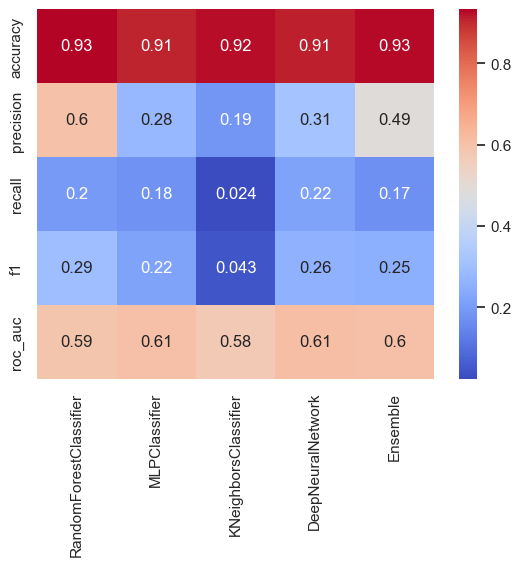

In [107]:
sns.heatmap(df_metrics, annot=True, cmap='coolwarm')
plt.show()

In [127]:
combined_report

,Antibody,Threshold,OASis Percentile,OASis Identity,Germline Content,Heavy V Germline,Heavy J Germline,Heavy OASis Percentile,Heavy OASis Identity,Heavy Non-human peptides,Heavy Germline Content,Light V Germline,Light J Germline,Light OASis Percentile,Light OASis Identity,Light Non-human peptides,Light Germline Content,Type
0,102-13,relaxed,0.154654,0.677570,0.734783,IGHV3-23*03,IGHJ4*01,0.445000,0.750000,"(28,)",0.750000,IGKV7-3*01,IGKJ2*01,0.068020,0.598039,41,0.718182,Success
1,104-15,relaxed,0.012000,0.459716,0.647577,IGHV1-69-2*01,IGHJ4*01,0.027000,0.392857,"(68,)",0.616667,IGKV1-16*01,IGKJ2*01,0.043000,0.535354,46,0.682243,Success
2,105-16,relaxed,0.004000,0.383886,0.638767,IGHV1-3*01,IGHJ4*01,0.013714,0.357143,"(72,)",0.591667,IGKV1-16*01,IGKJ2*01,0.014828,0.414141,58,0.691589,Success
3,109-20,relaxed,0.048611,0.516588,0.704846,IGHV1-3*01,IGHJ1*01,0.013000,0.345794,"(70,)",0.626087,IGKV2-30*01,IGKJ4*01,0.173385,0.692308,32,0.785714,Success
4,1140-1053,relaxed,0.031233,0.479452,0.710638,IGHV1-69-2*01,IGHJ6*01,0.033404,0.403509,"(68,)",0.647541,IGKV4-1*01,IGKJ2*01,0.059190,0.561905,46,0.778761,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,9961-9865,relaxed,0.011550,0.445498,0.687225,IGHV7-4-1*02,IGHJ4*01,0.064364,0.472727,"(58,)",0.720339,IGLV7-46*01,IGLJ3*02,0.015168,0.415842,59,0.651376,Scramble
1496,9968-2304,relaxed,0.004000,0.406417,0.635468,IGHV3-49*04,IGHJ6*01,0.089364,0.554545,"(49,)",0.669492,IGKV6-21*01,IGKJ1*01,0.000000,0.194805,62,0.588235,Scramble
1497,9973-5998,relaxed,0.004000,0.377990,0.657778,IGHV1-69-2*01,IGHJ4*01,0.013000,0.342593,"(71,)",0.663793,IGLV7-46*01,IGLJ2*01,0.015168,0.415842,59,0.651376,Scramble
1498,9974-7844,relaxed,0.004000,0.339713,0.635556,IGHV1-69-2*01,IGHJ4*01,0.009865,0.324324,"(75,)",0.613445,IGKV6-21*01,IGKJ4*01,0.005000,0.357143,63,0.660377,Scramble


In [128]:
# rename the type column to Success
combined_report.rename(columns={"Type": "Success"}, inplace=True)
# also make the values in the Success column 0 and 1 for scramble and success
combined_report["Success"] = combined_report["Success"].apply(lambda x: 1 if x == "Success" else 0)
# now run the function on the combined_report
metrics = train_and_evaluate_models(combined_report)


In [129]:
df_metricsbiophi = pd.DataFrame(metrics)
df_metricsbiophi

,RandomForestClassifier,LogisticRegression,MLPClassifier,SVC,KNeighborsClassifier,GradientBoostingClassifier,XGBoostClassifier
accuracy,0.816216,0.816216,0.713514,0.821622,0.772973,0.821622,0.745946
precision,0.000000,0.000000,0.142857,0.000000,0.263158,0.000000,0.150000
recall,0.000000,0.000000,0.121212,0.000000,0.151515,0.000000,0.090909
f1,0.000000,0.000000,0.131148,0.000000,0.192308,0.000000,0.113208
roc_auc,0.614135,0.586324,0.518541,0.554625,0.542364,0.630981,0.513357


In [ ]:
# ensembl learning???? 
# can we increase our data for the biophi data